In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir("D:\\Backup\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\Test_files\\All\\")
file_list=os.listdir()
len(file_list)
all_st=[]
for i in range(len(file_list)):
    all_st.append(pd.read_csv(file_list[i]))

In [4]:
print(all_st[0].columns.tolist())
## Read only croplands
cros=[]
for i in range(len(all_st)):
    # print(all_st[i]["LEinst"].dropna().shape)
    if all_st[i]["Veg"].unique()[0]=="CRO":
        cros.append(all_st[i])

['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI', 'EVI', 'SAVI', 'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude.1', 'latitude.1', 'NDVI_neg', 'pos_NDVI', 'int', 'sd_ndvi', 'NDWI', 'LST_neg', 'LST_NW', 'T_LST_DEM', 'LST_neg_1', 'LST_NW_1', 'Tao_sw', 'EA', 'W_ATM', 'Rl_up', 'Rs_down', 'Tao_sw_1', 'ES', 'EA_1', 'Rl_down', 'Rn', 'Ginst', 'zom', 'u_fr', 'Hinst', 'rah', 'dT', 'rah_first', 'zom_1', 'u_fr_1', 'ufric_star', 'ET_inst', 'ET_24h', 'LEinst', 'EF', 'id.1', 'longitude.2', 'latitude.2', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'cold_pixel_lat', 'cold_pixel_lon', 'cold_pixel_ndvi', 'cold_pixel_sum', 'cold_pixel_temp', 'hot_pixel_sum', 'hot_pixel_lat', 'hot_pixel_lon', 'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp', 'zenith_angle', 'Datetime_Local_x', 'Datetime_GMT', 'Date_x', 'Unnamed: 0_y', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TAU_1_1_1', 'H_1

In [5]:
### Control for quality
for i in range(len(cros)):
    print(cros[i].shape)
#     print("Number of H>0",cros[i][(cros[i]["Hinst"]>-10) & (cros[i]["Hinst"]<1000)]["Hinst"].shape[0])
#     print("Men H",cros[i][(cros[i]["Hinst"]>-10) & (cros[i]["Hinst"]<1000)]["Hinst"].mean())
# #     print("Number of H<-100",cros[i][cros[i]["Hinst"]<-100]["Hinst"].shape[0])
# #     print("Number of H>10000",cros[i][cros[i]["Hinst"]>10000]["Hinst"].shape[0])
# #     print("Number of H>10000",cros[i][cros[i][h[i][0]>10000]["Hinst"].shape[0])
# #     print("Mean Hobs",cros[i][le[i][0]].mean())
# #     print("Mean LE",cros[i]["LEinst"].mean())
# #     print("Mean Netrad",cros[i][NETRAD_list[i][0]].describe())
# #     print("Mean Netrad SEBAL",cros[i]["Rn"].describe())
#     print("LE good",cros[i][cros[i]["LEinst"]>0]["LEinst"].shape[0])
#     print("Mean LE",cros[i][cros[i]["LEinst"]>0]["LEinst"].mean())
    cros[i]=cros[i][(cros[i]["Hinst"]>-10) & (cros[i]["Hinst"]<1000)]
    cros[i]=cros[i][cros[i]["LEinst"]>0]
# #     print("H mean",cros[i]["Hinst"].mean())

(260, 260)
(119, 170)
(252, 244)
(252, 218)
(252, 229)
(226, 159)
(303, 170)
(226, 187)
(226, 188)


In [6]:
for i in range(len(cros)):
    print(cros[i].columns.tolist())
    print(cros[i].shape)

['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'id', 'longitude', 'latitude', 'date', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'ST_B10', 'pixel_qa', 'ALFA', 'NDVI', 'EVI', 'SAVI', 'T_LST', 'LAI', 'e_0', 'e_NB', 'longitude.1', 'latitude.1', 'NDVI_neg', 'pos_NDVI', 'int', 'sd_ndvi', 'NDWI', 'LST_neg', 'LST_NW', 'T_LST_DEM', 'LST_neg_1', 'LST_NW_1', 'Tao_sw', 'EA', 'W_ATM', 'Rl_up', 'Rs_down', 'Tao_sw_1', 'ES', 'EA_1', 'Rl_down', 'Rn', 'Ginst', 'zom', 'u_fr', 'Hinst', 'rah', 'dT', 'rah_first', 'zom_1', 'u_fr_1', 'ufric_star', 'ET_inst', 'ET_24h', 'LEinst', 'EF', 'id.1', 'longitude.2', 'latitude.2', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'cold_pixel_lat', 'cold_pixel_lon', 'cold_pixel_ndvi', 'cold_pixel_sum', 'cold_pixel_temp', 'hot_pixel_sum', 'hot_pixel_lat', 'hot_pixel_lon', 'hot_pixel_ndvi', 'hot_pixel_Rn', 'hot_pixel_G', 'hot_pixel_temp', 'zenith_angle', 'Datetime_Local_x', 'Datetime_GMT', 'Date_x', 'Unnamed: 0_y', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TAU_1_1_1', 'H_1

In [7]:
## Columns names for inst obs
sw_in=['SW_IN_1_1_1','SW_IN_1_1_1','SW_IN_PI_F_1_1_1','SW_IN_PI_F_1_1_1','SW_IN_PI_F_1_1_1',"SW_IN","SW_IN","SW_IN","SW_IN"]
lw_in=['LW_IN_1_1_1','LW_IN_1_1_1','LW_IN_PI_F_1_1_1','LW_IN_PI_F_1_1_1','LW_IN_PI_F_1_1_1',"LW_IN","LW_IN","LW_IN","LW_IN"]
lw_out=['LW_OUT_1_1_1','LW_OUT_1_1_1','LW_OUT_PI_F_1_1_1','LW_OUT_PI_F_1_1_1','LW_OUT_PI_F_1_1_1',"LW_OUT","LW_OUT","LW_OUT","LW_OUT"]
netrad=['NETRAD_1_1_1','NETRAD_1_1_1','NETRAD_PI_F_1_1_1','NETRAD_PI_F_1_1_1','NETRAD_PI_F_1_1_1',"NETRAD","NETRAD","NETRAD","NETRAD"]
g=['G_1_1_1','G_1_1_1','G_PI_F_1_1_1','G_PI_F_1_1_1','G_PI_F_1_1_1',"G","G","G_1_1_1","G_1_1_1"]
h=['H_1_1_1','H_1_1_1','H_PI_F_1_1_1','H_PI_F_1_1_1','H_PI_F_1_1_1',"H","H","H","H"]
le=['LE_1_1_1','LE_1_1_1','LE_PI_F_1_1_1','LE_PI_F_1_1_1','LE_PI_F_1_1_1',"LE","LE","LE","LE"]


In [8]:
for i in range(len(cros)):
    cros[i]=cros[i].rename(columns={sw_in[i]:"SW_IN_inst_af",lw_in[i]:"LW_IN_inst_af",lw_out[i]:"LW_OUT_inst_af",netrad[i]:"Rn_inst_af",g[i]:"G_inst_af",h[i]:"H_inst_af",le[i]:"LE_inst_af"})

In [9]:
from sklearn.metrics import mean_squared_error
def bias_points(df,y,x,new_col):
    df[new_col]=(df[y]-df[x])/df[x]
    return df
def abs_points(df,y,x,new_col):
    df[new_col]=((df[y]-df[x])/df[x]).abs()
    return df

In [10]:
for i in range(len(cros)):
    print(cros[i]["LE_closed"])


KeyError: 'LE_closed'

In [11]:
for i in range(len(cros)):
    #swin
    abs_points(cros[i],"Rs_down","SW_IN_inst_af","swin_mae") 
    # LWIN
    abs_points(cros[i],"Rl_down","LW_IN_inst_af","lwin_mae") 
    #lwout
    abs_points(cros[i],"Rl_up","LW_OUT_inst_af","lwout_mae") 
    #netrad
    abs_points(cros[i],"Rn","Rn_inst_af","rn_mae") 
    #G
    abs_points(cros[i],"Ginst","G_inst_af","g_mae") 
    #H
    abs_points(cros[i],"Hinst","H_inst_af","h_mae")     
# LE
    abs_points(cros[i],"LEinst","LE_inst_af","le_mae")     
# Albedo
    abs_points(cros[i],"ALFA","Albedo","albedo_mae")
    #Tao     
    abs_points(cros[i],"Tao_sw","Tao_sw_am","tao_mae")     
#




In [12]:
concat=pd.concat(cros)
concat=concat[["albedo_mae","tao_mae","swin_mae","lwin_mae","lwout_mae","rn_mae","g_mae","h_mae","le_mae"]]
# concat.describe()

1       64.3475
23     291.8120
25     291.8120
27     266.2400
28     266.2400
         ...   
194     68.2747
196     68.2747
198    305.9990
199    305.9990
201    265.4920
Name: LE_inst_af, Length: 94, dtype: float64

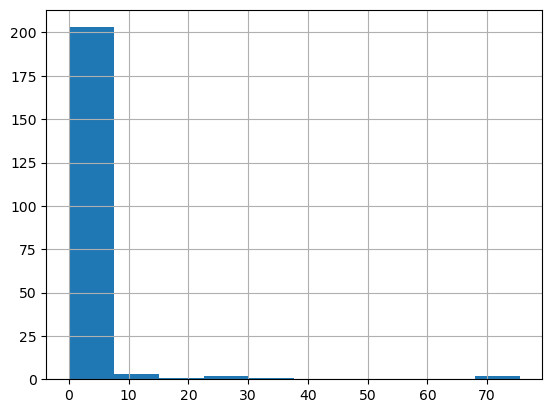

In [13]:
concat=concat.dropna()
concat["h_mae"].hist()
cros[0]["LE_inst_af"].dropna()

### Lets start a new one here: 
Why ML on this dataset: 
Find out which parameter is the most important parameter leading to the errors. 
- Begin by doing it for one station US-ARM
- With errors from LEdaily, upscaling(EToinst, ETodaily, ETo ratio) , LEinst  H, Rn, and G 


Axes(0.125,0.11;0.775x0.77)
['Unnamed: 0.2', 'date', 'Rs_down', 'Rl_up', 'Rl_down', 'Rn', 'Ginst', 'Hinst', 'LEinst', 'LE_Daily_model', 'ETo_model_hourly', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'NDVI', 'ET_24h', 'ALFA', 'Tao_sw', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'T_LST', 'NDWI', 'Datetime_Local_x', 'Datetime_GMT', 'Unnamed: 0.1', 'Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TAU_1_1_1', 'H_inst_af', 'LE_inst_af', 'FC_1_1_1', 'u_st', 'WS_MAX_1_1_1', 'WD_1_1_1', 'USTAR_1_1_1', 'MO_LENGTH_1_1_1', 'T_SONIC_1_1_1', 'CO2_1_1_1', 'H2O_1_1_1', 'U_SIGMA_1_1_1', 'V_SIGMA_1_1_1', 'W_SIGMA_1_1_1', 'T_SONIC_SIGMA_1_1_1', 'FETCH_MAX_1_1_1', 'FETCH_70_1_1_1', 'FETCH_80_1_1_1', 'FETCH_90_1_1_1', 'TAU_SSITC_TEST_1_1_1', 'H_SSITC_TEST_1_1_1', 'LE_SSITC_TEST_1_1_1', 'FC_SSITC_TEST_1_1_1', 'PA_1_1_1', 'Temp_st', 'TA_2_1_1', 'RH_st', 'RH_2_1_1', 'SW_IN_inst_af', 'LW_IN_st', 'SW_OUT_1_1_1', 'LW_OUT_st', 'NETRAD_1_1_2', 'SW_IN_1_1_2', 'PPFD_IN_1_1_1', 'Precip_st', 'G_1_1_1', 'G

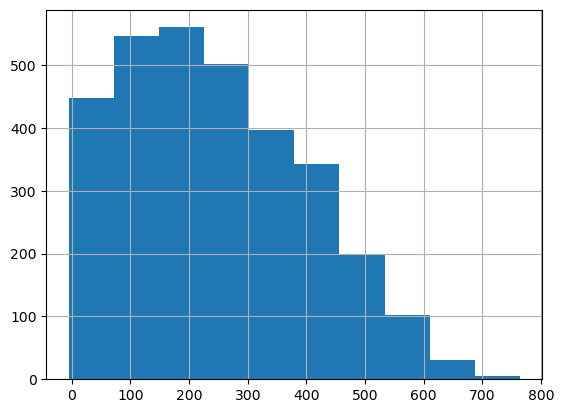

In [14]:
## Read the datasets, remoeve shady values and perform a random forest 
os.chdir("D:\\Backup\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\run2_miguel\\ML_ready\\RF_bias")
file_list=os.listdir()
error_list=[]
for i in range(len(file_list)):
    error_list.append(pd.read_csv(file_list[i],parse_dates=["Date"]))
print(pd.concat(error_list)["LEinst"].hist()) ## looks good both HInst and LEinst 
print(error_list[0].columns.tolist())
for i in range(len(file_list)):
    # error_list[i]=
    error_list[i]=error_list[i][error_list[i]["LE_closed"]>=0]
    error_list[i]["Closure"]=error_list[i]["Rn_unclosed"]-error_list[i]["H_closed"]-error_list[i]["LE_closed"]-error_list[i]["G_unclosed"]
    # print(error_list[i].shape)


In [5]:
error_list[0].columns.tolist()

['Unnamed: 0.2',
 'date',
 'Rs_down',
 'Rl_up',
 'Rl_down',
 'Rn',
 'Ginst',
 'Hinst',
 'LEinst',
 'LE_Daily_model',
 'ETo_model_hourly',
 'Rn24h_G',
 'AirT_G',
 'RH_G',
 'ux_G',
 'SW_Down',
 'NDVI',
 'ET_24h',
 'ALFA',
 'Tao_sw',
 'UB',
 'B',
 'GR',
 'R',
 'NIR',
 'SWIR_1',
 'SWIR_2',
 'T_LST',
 'NDWI',
 'Datetime_Local_x',
 'Datetime_GMT',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'TIMESTAMP_START',
 'TIMESTAMP_END',
 'TAU_1_1_1',
 'H_inst_af',
 'LE_inst_af',
 'FC_1_1_1',
 'u_st',
 'WS_MAX_1_1_1',
 'WD_1_1_1',
 'USTAR_1_1_1',
 'MO_LENGTH_1_1_1',
 'T_SONIC_1_1_1',
 'CO2_1_1_1',
 'H2O_1_1_1',
 'U_SIGMA_1_1_1',
 'V_SIGMA_1_1_1',
 'W_SIGMA_1_1_1',
 'T_SONIC_SIGMA_1_1_1',
 'FETCH_MAX_1_1_1',
 'FETCH_70_1_1_1',
 'FETCH_80_1_1_1',
 'FETCH_90_1_1_1',
 'TAU_SSITC_TEST_1_1_1',
 'H_SSITC_TEST_1_1_1',
 'LE_SSITC_TEST_1_1_1',
 'FC_SSITC_TEST_1_1_1',
 'PA_1_1_1',
 'Temp_st',
 'TA_2_1_1',
 'RH_st',
 'RH_2_1_1',
 'SW_IN_inst_af',
 'LW_IN_st',
 'SW_OUT_1_1_1',
 'LW_OUT_st',
 'NETRAD_1_1_2',
 'SW_IN_1_1_2',
 '

In [6]:
from sklearn.metrics import mean_squared_error
def bias_points(df,y,x,new_col):
    df[new_col]=(df[y]-df[x])/df[x]
    return df
def abs_points(df,y,x,new_col):
    # df[new_col]=((df[y]-df[x])/df[x]).abs()
    df[new_col]=((df[y]-df[x])/df[x]).abs()

    return df

In [7]:
### Lets plot the mean ET and the errors of GEESEBAL
def overall_bias_df(in_list,y,x,new_col,rmse_col,summary_df):
    veg=[]
    bias=[]
    rmse=[]
    mean_et=[]
    points=[]
    lat=[]
    lon=[]
    elev=[]
    mean_ta=[]
    mean_rh=[]
    mean_w=[]
    mean_Rn=[]
    mean_H=[]
    mean_G=[]
    std_et=[]
    mean_swin=[]
    for i in range(len(in_list)):
        print(in_list[i].shape)
        veg.append(in_list[i]["Veg"].unique()[0])
        lat.append(in_list[i]["Lat"].unique()[0])
        lon.append(in_list[i]["Long"].unique()[0])
        elev.append(in_list[i]["Elevation"].unique()[0])
        bias.append((in_list[i][y].mean()-in_list[i][x].mean())/in_list[i][x].mean())
        points.append(in_list[i].shape[0])
        # print(in_list[i][x].isna().sum())
        # print(in_list[i][y].isna().sum())
        rmse.append(mean_squared_error(in_list[i][(in_list[i][x].notna()) & (in_list[i][y].notna())][x], in_list[i][(in_list[i][x].notna()) & (in_list[i][y].notna())][y], squared=False))
        mean_et.append(in_list[i]["LE_closed"].mean())
        std_et.append(in_list[i]["LE_closed"].std())

        mean_H.append(in_list[i]["H_closed"].mean())
        mean_G.append(in_list[i]["G_unclosed"].mean())
        mean_Rn.append(in_list[i]["Rn_unclosed"].mean())
        mean_swin.append(in_list[i]["SW_IN_daily"].mean())

        # mean_ta.append(in_list[i][temp_newnames[i]].mean())
        # mean_rh.append(in_list[i][rh_newnames[i]].mean())
        # mean_w.append(in_list[i][ws_newnames[i]].mean())

    if summary_df.shape[0]==0:
        summmary_df=pd.DataFrame()
        summary_df["veg"]=veg
        # summary_df["Stn_Name"]=names
        summary_df[new_col]=bias
        summary_df[rmse_col]=rmse
        summary_df["Mean_ET"]=mean_et
        summary_df["std_ET"]=std_et

        # summary_df["Mean_Temp"]=mean_ta
        # summary_df["Mean_RH"]=mean_rh
        # summary_df["Mean_ws"]=mean_w
        summary_df["Mean_H"]=mean_H
        summary_df["Mean_G"]=mean_G
        summary_df["Mean_Rn"]=mean_Rn
        summary_df["Mean_swin"]=mean_swin
        summary_df["points"]=points
        summary_df["Lat"]=lat
        summary_df["Lon"]=lon
        summary_df["Elevation"]=elev
    else:
        summary_df[new_col]=bias
        summary_df[rmse_col]=rmse
        summary_df["Mean_ET"]=mean_et
        summary_df["std_ET"]=std_et

        summary_df["points"]=points
        summary_df["Lat"]=lat
        summary_df["Lon"]=lon
        summary_df["Elevation"]=elev
        # summary_df["Mean_Temp"]=mean_ta
        # summary_df["Mean_RH"]=mean_rh
        # summary_df["Mean_ws"]=mean_w
        summary_df["Mean_H"]=mean_H
        summary_df["Mean_G"]=mean_G
        summary_df["Mean_Rn"]=mean_Rn
        summary_df["Mean_swin"]=mean_swin

    summary_df[new_col]=summary_df[new_col]*100
    lc=[]
    for i in summary_df["veg"].unique():
        lc.append(summary_df[summary_df["veg"]==i])
    return lc,summary_df
## Callling first function---------------------------------
# for i in range(len(inst_df_sat)):
#     bias_points(inst_df_sat[i],"led_ef","LE_unclosed","Led_bias_ef") #origingal model bias
#     bias_points(inst_df_sat[i],"led_eto","LE_unclosed","Led_bias_eto") # model bias using obs LEinst andf EF upscaling 
#     bias_points(inst_df_sat[i],"led_swin","LE_unclosed","Led_bias_swin") # Model bias using obs LEinst but ETo upscaling
#     bias_points(inst_df_sat[i],"Xd_Xi_eto","Xd_Xi_unclosed","Xd_Xi_bias_eto") # Model bias using obs LEinst but ETo upscaling
#     bias_points(inst_df_sat[i],"Xd_Xi_sw","Xd_Xi_unclosed","Xd_Xi_bias_swin") # Model bias using obs LEinst but ETo upscaling
#     bias_points(inst_df_sat[i],"Xd_Xi_ef","Xd_Xi_unclosed","Xd_Xi_bias_ef") # Model bias using obs LEinst but ETo upscaling
#     abs_points(inst_df_sat[i],"Xd_Xi_ef","Xd_Xi_unclosed","Xd_Xi_mae_ef") #origingal model bias
#     abs_points(inst_df_sat[i],"Xd_Xi_sw","Xd_Xi_unclosed","Xd_Xi_mae_swin") #origingal model bias
#     abs_points(inst_df_sat[i],"Xd_Xi_eto","Xd_Xi_unclosed","Xd_Xi_mae_eto") #origingal model bias

#Calling second function----------------------------
overall_list,overall_df=overall_bias_df(error_list,"LE_Daily_model","LE_closed","Led_bias_ef","rmse_bias_ef",pd.DataFrame())
overall_list,overall_df=overall_bias_df(error_list,"LE_eto_ups","LE_closed","Led_bias_eto","rmse_bias_eto",overall_df)
# overall_list,overall_df=overall_bias_df(error_list,"led_swin","LE_closed","Led_bias_swin","rmse_bias_swin",overall_df)


(71, 265)
(165, 195)
(134, 194)
(52, 162)
(41, 370)
(79, 219)
(18, 193)
(18, 190)
(27, 157)
(74, 165)
(70, 165)
(55, 198)
(59, 196)
(41, 175)
(40, 175)
(33, 156)
(70, 202)
(22, 176)
(28, 165)
(22, 172)
(87, 249)
(87, 223)
(68, 234)
(52, 229)
(39, 181)
(84, 178)
(69, 178)
(35, 162)
(54, 165)
(41, 165)
(76, 192)
(87, 192)
(127, 176)
(97, 172)
(300, 211)
(67, 175)
(16, 192)
(15, 193)
(15, 193)
(268, 186)
(61, 184)
(89, 173)
(22, 308)
(17, 274)
(28, 318)
(19, 297)
(23, 291)
(23, 317)
(25, 317)
(71, 265)
(165, 195)
(134, 194)
(52, 162)
(41, 370)
(79, 219)
(18, 193)
(18, 190)
(27, 157)
(74, 165)
(70, 165)
(55, 198)
(59, 196)
(41, 175)
(40, 175)
(33, 156)
(70, 202)
(22, 176)
(28, 165)
(22, 172)
(87, 249)
(87, 223)
(68, 234)
(52, 229)
(39, 181)
(84, 178)
(69, 178)
(35, 162)
(54, 165)
(41, 165)
(76, 192)
(87, 192)
(127, 176)
(97, 172)
(300, 211)
(67, 175)
(16, 192)
(15, 193)
(15, 193)
(268, 186)
(61, 184)
(89, 173)
(22, 308)
(17, 274)
(28, 318)
(19, 297)
(23, 291)
(23, 317)
(25, 317)


['CRO']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
['CRO', 'ENF']
[13 14 15 16 17 18 19 20 21]
['CRO', 'ENF', 'OSH']
[22 23 24]
['CRO', 'ENF', 'OSH', 'GRA']
[25 26 27 28 29 30 31 32 33 34 35 36]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV']
[37 38]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV', 'DBF']
[39 40 41 42]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV', 'DBF', 'WET']
[43]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV', 'DBF', 'WET', 'CSH']
[44 45 46]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV', 'DBF', 'WET', 'CSH', 'WSA']
[47 48]


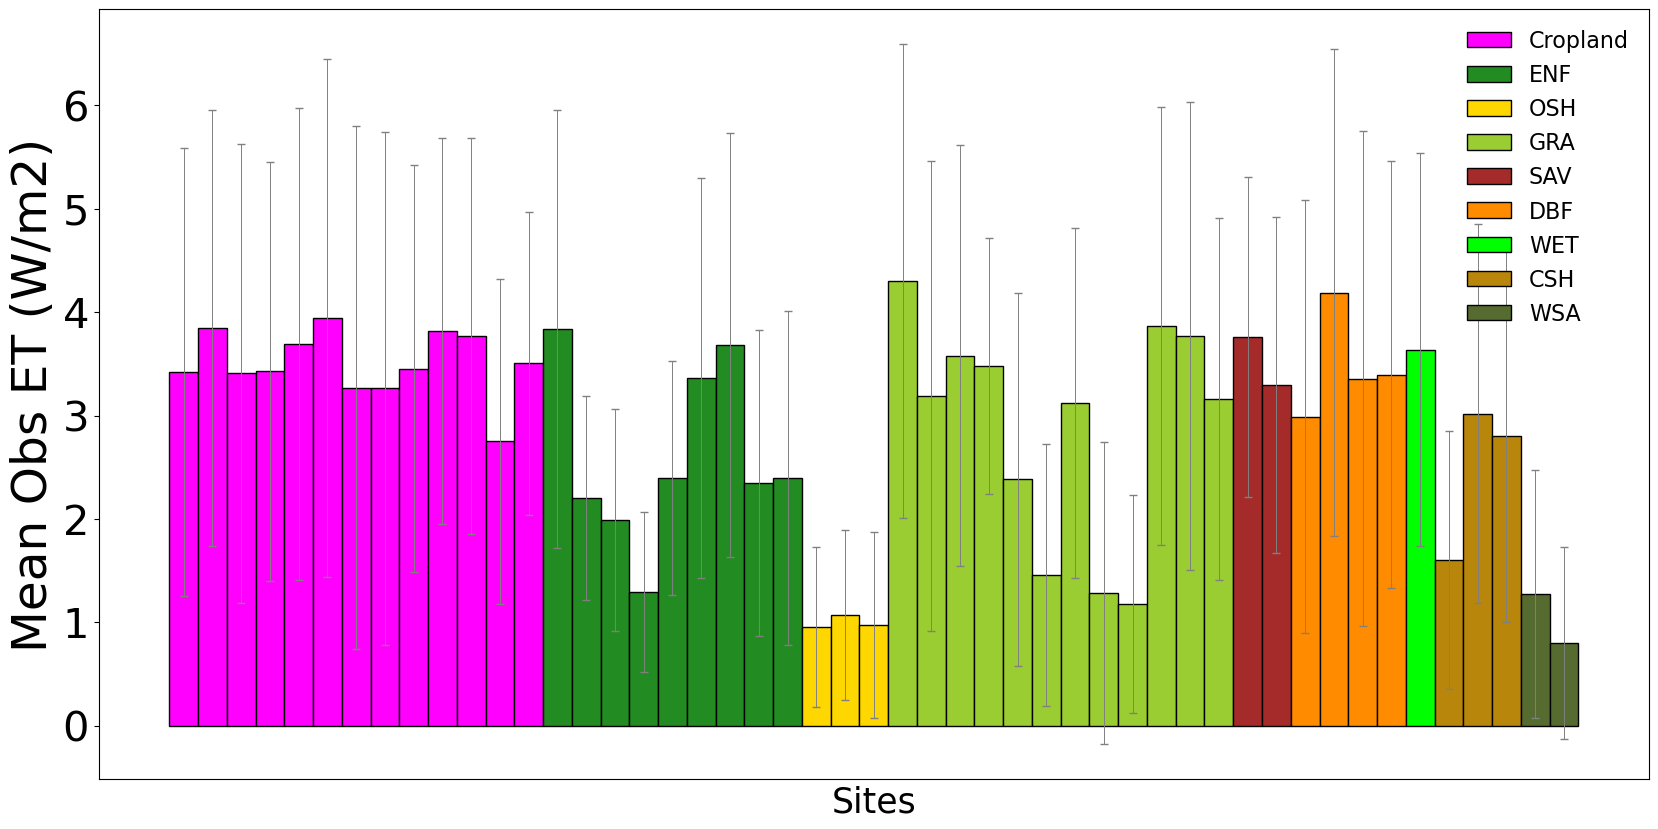

In [8]:
## Overall results for specific landcover
fig, ax = plt.subplots(figsize=(20,10))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
pos=[]
add=0
labels=[]
for i in range(len(overall_list)):
    # print(len(lc[i]))
    # print(np.arange(add,add+2*len(lc[i])))
    labels.append(overall_list[i]["veg"].iloc[0])
    print(labels)
    pos.append(np.arange(add,add+len(overall_list[i])))
    print(pos[i])
    add=add+len(overall_list[i])
colors=["magenta","forestgreen","gold","yellowgreen","brown","darkorange","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]
# labels=["Cropland" ,"closed shrubland", "mixed", "deciduous broadleaf", "evergreen forest","grasslands","mixed forest", "openshrublands","savannas","wetlands","woodysavannas"]
labels=["Cropland" , "ENF","OSH","GRA","SAV","DBF","WET", "CSH","WSA"]

# pos[0]
# # Make the plot
for i in range(len(pos)):
    # plt.bar(pos[i], overall_list[i]["Mean_LEinst_Daily"] ,color=colors[i], width=1, edgecolor='white',align="edge",label=labels[i])
    plt.bar(pos[i], overall_list[i]["Mean_ET"]/28.36,color=colors[i], width=1, edgecolor='Black',align="edge",label=labels[i],yerr=overall_list[i]["std_ET"]/28.36,\
        error_kw=dict(ecolor='gray', lw=0.7, capsize=3, capthick=1))
    # plt.bar(pos[i], overall_list[i]["Mean_EToinst_daily_model"],fill=False, width=1, edgecolor='red',align="edge",linestyle="-.")

# # plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# # plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# # Add xticks on the middle of the group bars
plt.xlabel('Sites',fontsize=25)
plt.ylabel('Mean Obs ET (W/m2)',fontsize=35)

# plt.xticks([], ['CRO', 'B', 'C', 'D', 'E'])
plt.xticks([])
plt.yticks(fontsize=30)
# plt.ylim(-100,1000)
# # Create legend & Show graphic
plt.legend(fontsize=16,frameon=False)
plt.show()

['CRO']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
['CRO', 'ENF']
[13 14 15 16 17 18 19 20 21]
['CRO', 'ENF', 'OSH']
[22 23 24]
['CRO', 'ENF', 'OSH', 'GRA']
[25 26 27 28 29 30 31 32 33 34 35 36]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV']
[37 38]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV', 'DBF']
[39 40 41 42]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV', 'DBF', 'WET']
[43]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV', 'DBF', 'WET', 'CSH']
[44 45 46]
['CRO', 'ENF', 'OSH', 'GRA', 'SAV', 'DBF', 'WET', 'CSH', 'WSA']
[47 48]


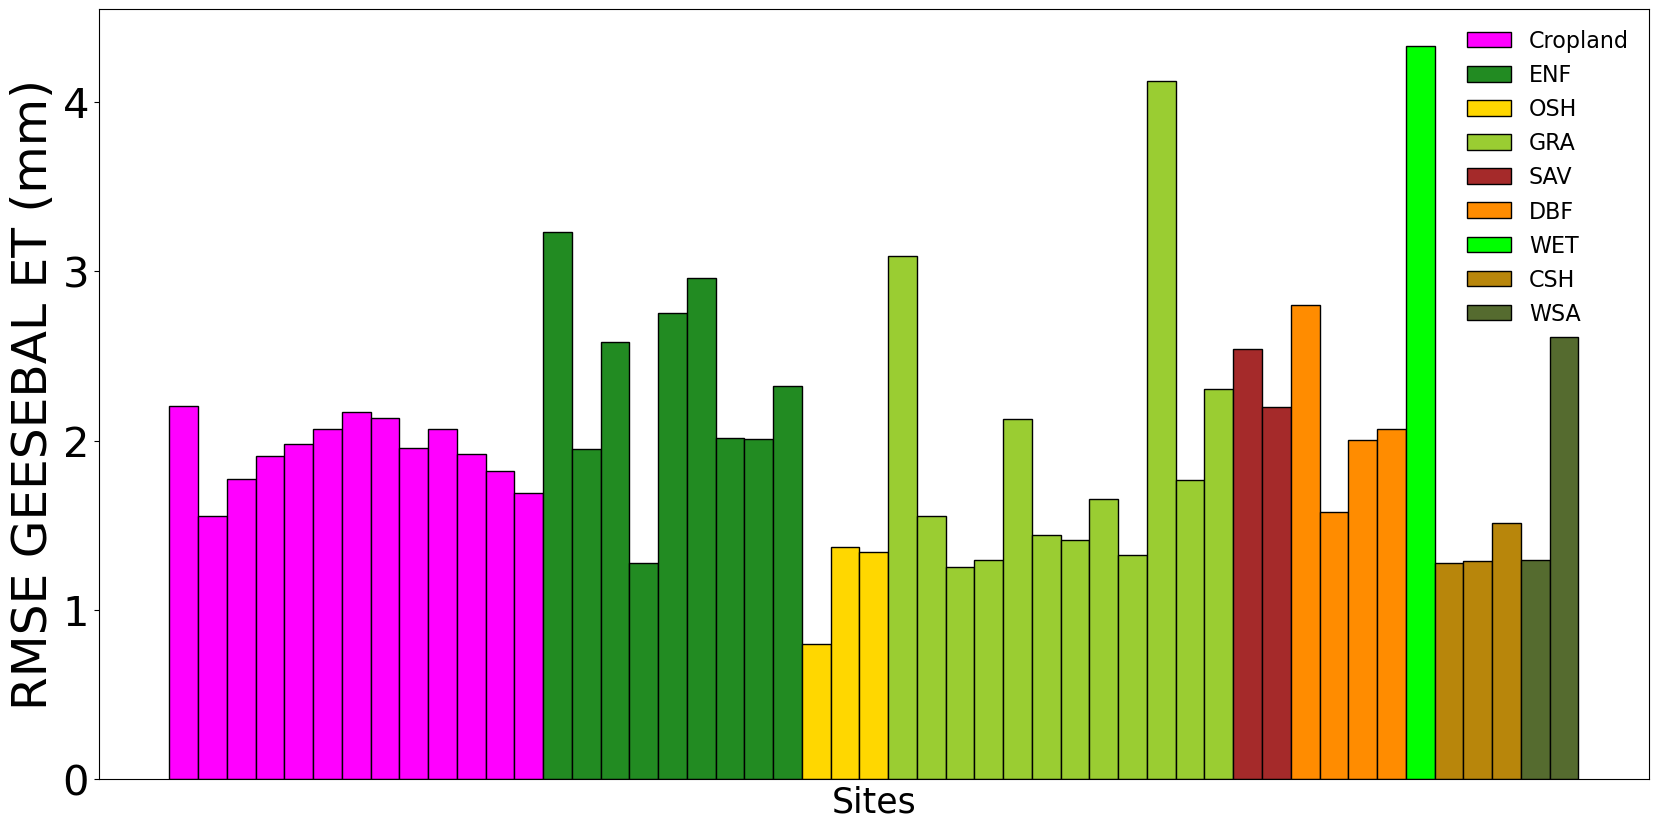

In [9]:
## Overall results for specific landcover
fig, ax = plt.subplots(figsize=(20,10))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
pos=[]
add=0
labels=[]
for i in range(len(overall_list)):
    # print(len(lc[i]))
    # print(np.arange(add,add+2*len(lc[i])))
    labels.append(overall_list[i]["veg"].iloc[0])
    print(labels)
    pos.append(np.arange(add,add+len(overall_list[i])))
    print(pos[i])
    add=add+len(overall_list[i])
colors=["magenta","forestgreen","gold","yellowgreen","brown","darkorange","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]
# labels=["Cropland" ,"closed shrubland", "mixed", "deciduous broadleaf", "evergreen forest","grasslands","mixed forest", "openshrublands","savannas","wetlands","woodysavannas"]
labels=["Cropland" , "ENF","OSH","GRA","SAV","DBF","WET", "CSH","WSA"]

# pos[0]
# # Make the plot
for i in range(len(pos)):
    # plt.bar(pos[i], overall_list[i]["Mean_LEinst_Daily"] ,color=colors[i], width=1, edgecolor='white',align="edge",label=labels[i])
    plt.bar(pos[i], overall_list[i]["rmse_bias_eto"]/28.36,color=colors[i], width=1, edgecolor='Black',align="edge",label=labels[i])
    # plt.bar(pos[i], overall_list[i]["Mean_EToinst_daily_model"],fill=False, width=1, edgecolor='red',align="edge",linestyle="-.")

# # plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# # plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# # Add xticks on the middle of the group bars
plt.xlabel('Sites',fontsize=25)
plt.ylabel('RMSE GEESEBAL ET (mm)',fontsize=35)

# plt.xticks([], ['CRO', 'B', 'C', 'D', 'E'])
plt.xticks([])
plt.yticks(fontsize=30)
# plt.ylim(-100,1000)
# # Create legend & Show graphic
plt.legend(fontsize=16,frameon=False)
plt.show()

In [10]:
## Calculate the biases 
def calc_daily_bias(df):
    df=bias_points(df,"Rn","Rn_inst_af","Rn_inst_bias")
    df=bias_points(df,"Hinst","H_inst_af","H_inst_bias")
    df=bias_points(df,"Ginst","G_inst_af","G_inst_bias")
    df["LE_res"]=df["Rn_inst_af"]-df["H_inst_af"]-df["G_inst_af"]
    df=bias_points(df,"LEinst","LE_inst_af","LE_inst_bias")
    df=bias_points(df,"LE_inst_af","LE_res","Closing_err")
    # df=bias_points(df,"LE_inst_af","LE_res","Closing_err_LE")
    df=bias_points(df,"LE_eto_ups","LE_closed","LEd_bias_eto_closed")
    df=bias_points(df,"ALFA","Albedo","Albedo_bias")
    df=bias_points(df,"Tao_sw","Tao_sw_am","Tao_bias")
    df=bias_points(df,"Rl_down","LW_IN_st","LW_IN_bias")
    df=bias_points(df,"Rl_up","LW_OUT_st","LW_OUT_bias")
    df=bias_points(df,"Rs_down","SW_IN_inst_af","SW_IN_bias")
    df=bias_points(df,"AirT_G","Temp_st","Temp_bias")
    df=bias_points(df,"RH_G","RH_st","RH_bias")
    df=bias_points(df,"ux_G","u_st","u_bias")

    # df=bias_points(df,"ALFA","Albedo","albedo_bias")
    # df=bias_points(df,"Albedo","Tao_sw_am","albedo_bias")


    print(df.columns.tolist())
    ### calculate bias in each step 
    ## ETd , ETod ,ETo inst, ETo ratio, ET inst, Rn inst, H inst, Ginst, Albedo, LE closed error 
    df=bias_points(df,"ETo_Daily_model","ETo_Daily","ETo_Daily_bias")
    df=bias_points(df,"ETo_model_hourly","ETo","ETo_hourly_bias")
    df["ETo_ratio_model"]=df["ETo_Daily_model"]/df["ETo_model_hourly"]
    df["ETo_ratio_station"]=df["ETo_Daily"]/df["ETo"]
    df=bias_points(df,"ETo_ratio_model","ETo_ratio_station","ETo_ratio_bias")
    return df
for i in range(len(error_list)):
    calc_daily_bias(error_list[i])
error_df=pd.concat(error_list)

['Unnamed: 0.2', 'date', 'Rs_down', 'Rl_up', 'Rl_down', 'Rn', 'Ginst', 'Hinst', 'LEinst', 'LE_Daily_model', 'ETo_model_hourly', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'NDVI', 'ET_24h', 'ALFA', 'Tao_sw', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'T_LST', 'NDWI', 'Datetime_Local_x', 'Datetime_GMT', 'Unnamed: 0.1', 'Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TAU_1_1_1', 'H_inst_af', 'LE_inst_af', 'FC_1_1_1', 'u_st', 'WS_MAX_1_1_1', 'WD_1_1_1', 'USTAR_1_1_1', 'MO_LENGTH_1_1_1', 'T_SONIC_1_1_1', 'CO2_1_1_1', 'H2O_1_1_1', 'U_SIGMA_1_1_1', 'V_SIGMA_1_1_1', 'W_SIGMA_1_1_1', 'T_SONIC_SIGMA_1_1_1', 'FETCH_MAX_1_1_1', 'FETCH_70_1_1_1', 'FETCH_80_1_1_1', 'FETCH_90_1_1_1', 'TAU_SSITC_TEST_1_1_1', 'H_SSITC_TEST_1_1_1', 'LE_SSITC_TEST_1_1_1', 'FC_SSITC_TEST_1_1_1', 'PA_1_1_1', 'Temp_st', 'TA_2_1_1', 'RH_st', 'RH_2_1_1', 'SW_IN_inst_af', 'LW_IN_st', 'SW_OUT_1_1_1', 'LW_OUT_st', 'NETRAD_1_1_2', 'SW_IN_1_1_2', 'PPFD_IN_1_1_1', 'Precip_st', 'G_1_1_1', 'G_inst_af', 'G_3_1_1', 'G_4_1

,Date,LE_closed,LE_Daily_model,LE_eto_ups,Closure,LE_unclosed,LEinst,Rn,Rn_inst_af,Ginst,Hinst,H_closed,LE_inst_af,LEd_bias_eto_closed,NDVI
133,2022-04-25,88.229828,-1.807268,-1.392364,0.018883,66.584462,-4.164266,561.250634,675.322441,103.651538,461.763362,82.750056,118.762651,-1.015781,0.281974
33,2018-10-01,14.874435,-0.889035,-1.452610,1.641617,18.604626,-3.903849,589.726195,495.271627,85.837833,507.792211,45.264134,55.766852,-1.097658,0.548627
48,2019-03-03,13.528642,-1.466469,-1.766291,-4.356643,12.231244,-3.756723,378.398242,486.309000,81.657475,300.497490,84.428501,25.389800,-1.130559,0.152149
60,2019-09-11,10.266071,-0.117317,-0.092971,0.115168,9.135119,-0.240777,424.308758,398.579400,138.085821,286.463714,106.057312,20.268700,-1.009056,0.164905
63,2020-02-18,27.585195,-0.488924,-0.596876,2.575185,29.057383,-1.727469,423.539848,455.448900,76.044093,349.223224,46.632786,66.873600,-1.021638,0.156082
69,2020-05-24,25.996432,-2.513991,-1.697128,2.178737,24.577443,-4.580601,554.465000,630.237600,177.421094,381.624507,124.060708,51.680100,-1.065283,0.175708
12,2018-01-24,30.077203,-0.286213,-1.087270,104.019729,5.616244,-2.125079,322.005858,261.740817,16.235563,307.895374,-84.363385,14.487000,-1.036149,0.295377
18,2020-05-03,93.214276,-1.256089,-1.317795,19.930027,117.378499,-3.057822,588.241330,628.207600,107.533892,483.765260,52.165775,226.119526,-1.014137,0.434404
15,2016-03-07,17.292298,-0.122297,-0.228798,7.015121,13.766667,-0.458135,410.133486,512.200000,58.803252,351.788369,39.017580,59.600000,-1.013231,0.225586
43,2018-05-16,45.366744,-1.293085,-0.837361,-9.349998,34.550000,-2.679671,515.305581,646.500000,127.193429,390.791823,127.658254,90.700000,-1.018458,0.249319


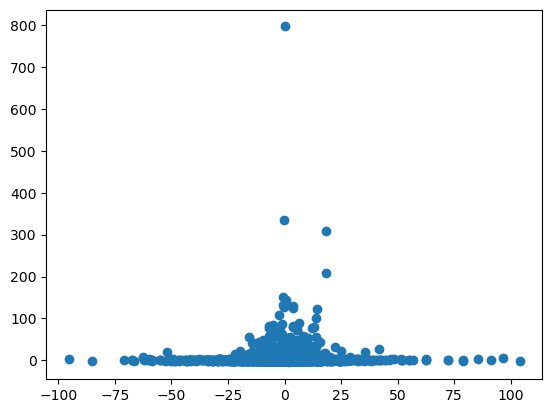

In [11]:
plt.plot(error_df["Closure"],error_df["LEd_bias_eto_closed"],"o")
error_df[error_df["LEd_bias_eto_closed"]>200][["Date","LE_closed","LE_Daily_model","LE_eto_ups","Closure","LE_unclosed"]]
error_df[error_df["LE_eto_ups"]<0][["Date","LE_closed","LE_Daily_model","LE_eto_ups","Closure","LE_unclosed","LEinst","Rn","Rn_inst_af","Ginst","Hinst","H_closed","LE_inst_af","LEd_bias_eto_closed","NDVI"]]
# error_df[error_df["H_inst_af"]>400][["Date","LE_closed","LE_Daily_model","LE_eto_ups","Closure","LE_unclosed","LEinst","Rn","Ginst","Hinst","H_closed","LE_inst_af","LEd_bias_eto_closed","NDVI"]]

In [12]:
for i in range(len(error_list)):
    error_list[i]=error_list[i][(error_list[i]["LEd_bias_eto_closed"]<=3) & (error_list[i]["LEd_bias_eto_closed"]>=-3)]

In [13]:
## Let's plot the errors 
## There are bias outliers
## Segregte the data based on unique landcover
cro,enf,osh,gra,sav,dbf,wet,csh,wsa=[],[],[],[],[],[],[],[],[]
for i in pd.concat(error_list)["Veg"].unique():
    print(i)
    for j in range(len(error_list)):
        if error_list[j]["Veg"].iloc[0]=="CRO":
            cro.append(error_list[j])
        elif error_list[j]["Veg"].iloc[0]=="ENF":
            enf.append(error_list[j])
        elif error_list[j]["Veg"].iloc[0]=="OSH":
            osh.append(error_list[j])  
        elif error_list[j]["Veg"].iloc[0]=="GRA":
            gra.append(error_list[j])
        elif error_list[j]["Veg"].iloc[0]=="SAV":
            sav.append(error_list[j])  
        elif error_list[j]["Veg"].iloc[0]=="DBF":
            dbf.append(error_list[j])  
        elif error_list[j]["Veg"].iloc[0]=="CSH":
            csh.append(error_list[j])  
        elif error_list[j]["Veg"].iloc[0]=="WSA":
            wsa.append(error_list[j])  
        else: 
            wet.append(error_list[j])  
            # print(error_list[j][error_list[j]["Veg"]])


CRO
ENF
OSH
GRA
SAV
DBF
WET
CSH
WSA


49

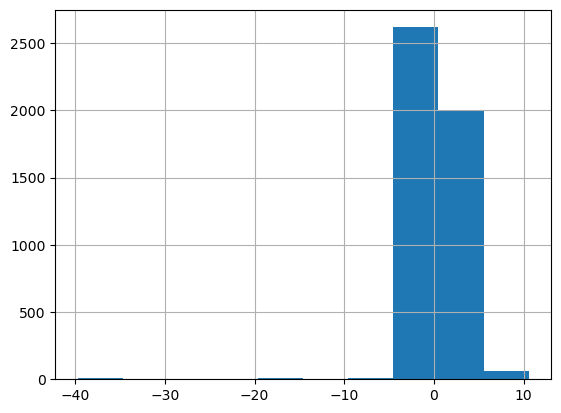

In [14]:
## now we do observe some weirdly large biases, lets apply iqr to them 
pd.concat(gra).LE_inst_bias.hist()
# pd.concat(dbf).shape
len(error_list)

In [15]:
import numpy as np

def remove_outliers(data,col):
  """Removes data points outside 1.5IQR from the given data.

  Args:
    data: A NumPy array of data.

  Returns:
    A NumPy array of data with the outliers removed.
  """

  # Calculate the first and third quartiles.
  # q1 = np.percentile(data[col], 25)
  # q3 = np.percentile(data[col], 75)  
  q1 = data[col].describe()[4]
  q3 = data[col].describe()[6]

  # Calculate the interquartile range.
  iqr = q3 - q1

  # Calculate the lower and upper bounds for the data.
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  print(lower_bound,upper_bound)  
  # Remove the data points outside the bounds.
  data = data[data[col] > lower_bound]
  data = data[data[col] < upper_bound]

  return data
crop=remove_outliers(pd.concat(cro),"LEd_bias_eto_closed")
# crop=remove_outliers(crop,"Albedo_bias")
# crop=remove_outliers(crop,"Tao_bias")
crop=remove_outliers(crop,"G_inst_bias")
crop=remove_outliers(crop,"H_inst_bias")
crop=remove_outliers(crop,"LE_inst_bias")
error_df=remove_outliers(error_df,"LEd_bias_eto_closed")
error_df=remove_outliers(error_df,"G_inst_bias")
error_df=remove_outliers(error_df,"H_inst_bias")
error_df=remove_outliers(error_df,"LE_inst_bias")
# np.percentile(crop["Albedo_bias"], 25)
# crop["Albedo_bias"].describe()
print(crop.shape)


-1.476279159214356 1.31520977825874
-1.6867473102851438 1.9006722592871554
-2.093408846448783 3.502329357002023
-1.4781941241756953 1.5015891010826046
-2.8898393489247303 4.267142576605391
-2.69477607321543 3.997855285412549
-1.6136746285857027 1.8472853250900174
-2.443023909653854 3.863364621532093
(5310, 443)


<Axes: >

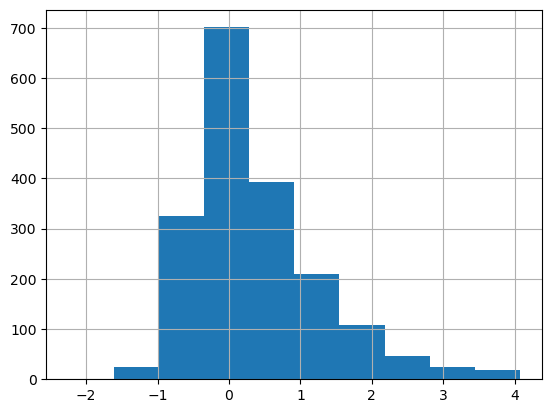

In [16]:
error_df["LEd_bias_eto_closed"].hist()

In [17]:
grass=remove_outliers(pd.concat(gra),"LEd_bias_eto_closed")
grass=remove_outliers(grass,"LE_inst_bias")

# grass=remove_outliers(grass,"Albedo_bias")
# grass=remove_outliers(grass,"Tao_bias")
grass=remove_outliers(grass,"G_inst_bias")
grass=remove_outliers(grass,"H_inst_bias")


-1.8671270545507317 2.43586162852546
-1.8048007256544998 2.776112519932899
-2.1192135665290857 3.6311553403103183
-1.3184562812814402 1.541165884876732


In [18]:
# savanah=remove_outliers(pd.concat(sav),"LEd_bias_eto_closed")
# savanah=remove_outliers(savanah,"Albedo_bias")
# savanah=remove_outliers(savanah,"Tao_bias")
savanah=remove_outliers(pd.concat(sav),"G_inst_bias")
savanah=remove_outliers(savanah,"LE_inst_bias")

savanah=remove_outliers(savanah,"H_inst_bias")
savanah.shape

-2.583577417863491 7.190219089333976
-2.1529894764907076 4.539039839138586
-1.4086640967543578 0.38314307089446487


(882, 174)

In [19]:
ever=remove_outliers(pd.concat(enf),"LEd_bias_eto_closed")
# ever=remove_outliers(ever,"Albedo_bias")
# ever=remove_outliers(ever,"Tao_bias")
ever=remove_outliers(ever,"G_inst_bias")
ever=remove_outliers(ever,"LE_inst_bias")

ever=remove_outliers(ever,"H_inst_bias")
ever.shape

-1.2101734049669612 2.6661053128409185
-5.480950340981757 8.819093295744526
-2.395738317226421 4.884486739513212
-1.550409629956163 0.8436474895311319


(2052, 601)

In [20]:
opensh=remove_outliers(pd.concat(osh),"LEd_bias_eto_closed")
# opensh=remove_outliers(opensh,"Albedo_bias")
# opensh=remove_outliers(opensh,"Tao_bias")

opensh=remove_outliers(opensh,"G_inst_bias")
opensh=remove_outliers(opensh,"LE_inst_bias")

opensh=remove_outliers(opensh,"H_inst_bias")
opensh.shape

-2.5720805424745965 2.85706751644802
-24.48390916400649 40.05039553510295
-2.963594462298548 3.9890266048922447
-0.8663046213735782 1.1388105143770066


(1404, 293)

In [21]:
decid=remove_outliers(pd.concat(dbf),"LEd_bias_eto_closed")
# decid=remove_outliers(decid,"Albedo_bias")
# decid=remove_outliers(decid,"Tao_bias")
decid=remove_outliers(decid,"G_inst_bias")
decid=remove_outliers(decid,"LE_inst_bias")

# decid=remove_outliers(decid,"H_inst_bias")
decid.shape

-1.4062994728602085 1.8089264115393988
-3.2425094615125643 8.689736271664227
-1.3806846064754248 2.1699341452889005


(441, 338)

In [22]:
wsaa=remove_outliers(pd.concat(wsa),"LEd_bias_eto_closed")
wsaa=remove_outliers(wsaa,"LE_inst_bias")

# wsaa=remove_outliers(wsaa,"Albedo_bias")
# wsaa=remove_outliers(wsaa,"Tao_bias")
wsaa=remove_outliers(wsaa,"G_inst_bias")
wsaa=remove_outliers(wsaa,"H_inst_bias")
wsaa.shape

-1.8691388586651967 3.5476835689518915
-2.9163559175317992 6.023517983136166
-1.1121455737136963 1.6560141094944063
-1.35757566372367 1.1199203334583983


(1719, 243)

<Axes: >

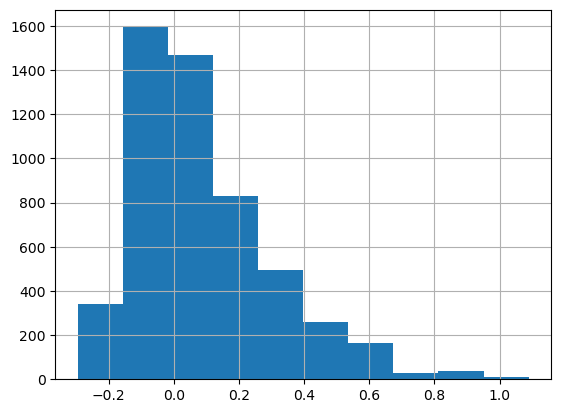

In [23]:

crop["RH_bias"].hist()

In [24]:
##crops absolute error
def calc_daily_mae(df):
    df=abs_points(df,"Rn","Rn_inst_af","Rn_inst_mae")
    df=abs_points(df,"Hinst","H_inst_af","H_inst_mae")
    df=abs_points(df,"Ginst","G_inst_af","G_inst_mae")
    df["LE_res"]=df["Rn_inst_af"]-df["H_inst_af"]-df["G_inst_af"]
    df=abs_points(df,"LEinst","LE_inst_af","LE_inst_mae")
    df=abs_points(df,"LE_inst_af","LE_res","Closing_err_LE_mae")
    # df=abs_points(df,"LE_inst_af","LE_res","Closing_err_LE")
    df=abs_points(df,"LE_eto_ups","LE_closed","LEd_mae_eto_closed")
    df=abs_points(df,"ALFA","Albedo","Albedo_mae")
    df=abs_points(df,"Tao_sw","Tao_sw_am","Tao_mae")
    df=abs_points(df,"Rl_down","LW_IN_st","LW_IN_mae")
    df=abs_points(df,"Rl_up","LW_OUT_st","LW_OUT_mae")
    df=abs_points(df,"Rs_down","SW_IN_inst_af","SW_IN_mae")
    df=abs_points(df,"AirT_G","Temp_st","Temp_mae")
    df=abs_points(df,"RH_G","RH_st","RH_mae")
    df=abs_points(df,"ux_G","u_st","u_mae")

    # df=abs_points(df,"ALFA","Albedo","albedo_mae")
    # df=abs_points(df,"Albedo","Tao_sw_am","albedo_mae")


    print(df.columns.tolist())
    ### calculate mae in each step 
    ## ETd , ETod ,ETo inst, ETo ratio, ET inst, Rn inst, H inst, Ginst, Albedo, LE closed error 
    df=abs_points(df,"ETo_Daily_model","ETo_Daily","ETo_Daily_mae")
    df=abs_points(df,"ETo_model_hourly","ETo","ETo_hourly_mae")
    df["ETo_ratio_model"]=df["ETo_Daily_model"]/df["ETo_model_hourly"]
    df["ETo_ratio_station"]=df["ETo_Daily"]/df["ETo"]
    df=abs_points(df,"ETo_ratio_model","ETo_ratio_station","ETo_ratio_mae")
    return df
calc_daily_mae(crop)
all_bias=[]
for i in range(len(error_list)):
    all_bias.append(calc_daily_mae(error_list[i]))


['Unnamed: 0.2', 'date', 'Rs_down', 'Rl_up', 'Rl_down', 'Rn', 'Ginst', 'Hinst', 'LEinst', 'LE_Daily_model', 'ETo_model_hourly', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'NDVI', 'ET_24h', 'ALFA', 'Tao_sw', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'T_LST', 'NDWI', 'Datetime_Local_x', 'Datetime_GMT', 'Unnamed: 0.1', 'Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TAU_1_1_1', 'H_inst_af', 'LE_inst_af', 'FC_1_1_1', 'u_st', 'WS_MAX_1_1_1', 'WD_1_1_1', 'USTAR_1_1_1', 'MO_LENGTH_1_1_1', 'T_SONIC_1_1_1', 'CO2_1_1_1', 'H2O_1_1_1', 'U_SIGMA_1_1_1', 'V_SIGMA_1_1_1', 'W_SIGMA_1_1_1', 'T_SONIC_SIGMA_1_1_1', 'FETCH_MAX_1_1_1', 'FETCH_70_1_1_1', 'FETCH_80_1_1_1', 'FETCH_90_1_1_1', 'TAU_SSITC_TEST_1_1_1', 'H_SSITC_TEST_1_1_1', 'LE_SSITC_TEST_1_1_1', 'FC_SSITC_TEST_1_1_1', 'PA_1_1_1', 'Temp_st', 'TA_2_1_1', 'RH_st', 'RH_2_1_1', 'SW_IN_inst_af', 'LW_IN_st', 'SW_OUT_1_1_1', 'LW_OUT_st', 'NETRAD_1_1_2', 'SW_IN_1_1_2', 'PPFD_IN_1_1_1', 'Precip_st', 'G_1_1_1', 'G_inst_af', 'G_3_1_1', 'G_4_1

['Unnamed: 0.2', 'date', 'Rs_down', 'Rl_up', 'Rl_down', 'Rn', 'Ginst', 'Hinst', 'LEinst', 'LE_Daily_model', 'ETo_model_hourly', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'NDVI', 'ET_24h', 'ALFA', 'Tao_sw', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'T_LST', 'NDWI', 'Datetime_Local_x', 'Datetime_GMT', 'Unnamed: 0.1', 'Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'FC_1_1_1', 'CO2_1_1_1', 'CO2_SIGMA_1_1_1', 'SC_1_1_1', 'LE_1_1_1', 'H2O_1_1_1', 'H2O_SIGMA_1_1_1', 'H_1_1_1', 'T_SONIC_1_1_1', 'T_SONIC_SIGMA_1_1_1', 'WD_1_1_1', 'u_st', 'USTAR_1_1_1', 'W_SIGMA_1_1_1', 'U_SIGMA_1_1_1', 'V_SIGMA_1_1_1', 'Temp_st', 'VPD_PI_1_1_1', 'RH_st', 'PA', 'TS_PI_1_1_A', 'TS_PI_1_2_A', 'TS_PI_1_3_A', 'TS_PI_1_4_A', 'TS_PI_1_5_A', 'swc_st', 'SWC_PI_1_2_A', 'SWC_PI_1_3_A', 'P', 'ZL_1_1_1', 'G_inst_af', 'Rn_inst_af', 'SW_IN_inst_af', 'PPFD_IN_1_1_1', 'PPFD_OUT_1_1_1', 'SW_IN_1_1_2', 'SW_OUT_1_1_1', 'LW_IN_st', 'LW_OUT_st', 'PPFD_DIR_1_1_1', 'PPFD_DIF_1_1_1', 'NEE_PI_F_1_1_1', 'GPP_PI_F_1_1_1', 

In [25]:
## Error df
error_df=pd.concat(all_bias)

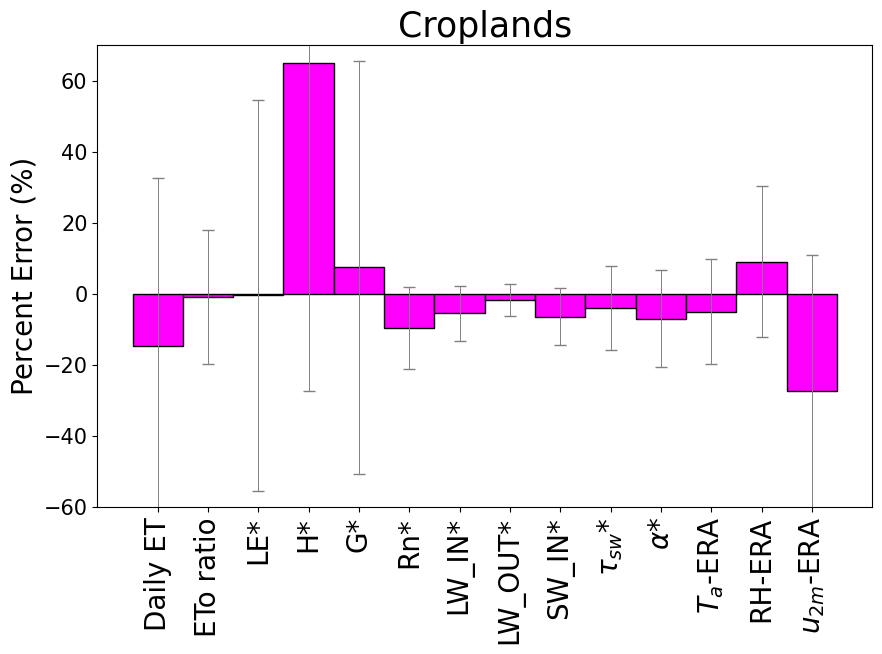

In [39]:
## Let's use this to generate bias charts
import seaborn as sns

def make_barchart_bias(df,bar_width = 1):
    bars=[]
    bars.append(df["LEd_bias_eto_closed"].mean()*100)
    bars.append(df["ETo_ratio_bias"].mean()*100)
    bars.append(df["LE_inst_bias"].mean()*100)
    bars.append(df["H_inst_bias"].mean()*100)
    bars.append(df["G_inst_bias"].mean()*100)
    bars.append(df["Rn_inst_bias"].mean()*100)
    bars.append(df["LW_IN_bias"].mean()*100)
    bars.append(df["LW_OUT_bias"].mean()*100)
    bars.append(df["SW_IN_bias"].mean()*100)

    
    bars.append(df["Tao_bias"].mean()*100)
    bars.append(df["Albedo_bias"].mean()*100)
    bars.append(df["Temp_bias"].mean()*100)
    bars.append(df["RH_bias"].mean()*100)
    bars.append(df["u_bias"].mean()*100)
    # print(bars)

    std_bars=[]
    std_bars.append(df["LEd_bias_eto_closed"].std()*100)
    std_bars.append(df["ETo_ratio_bias"].std()*100)
    std_bars.append(df["LE_inst_bias"].std()*100)
    std_bars.append(df["H_inst_bias"].std()*100)
    std_bars.append(df["G_inst_bias"].std()*100)
    std_bars.append(df["Rn_inst_bias"].std()*100)
    std_bars.append(df["LW_IN_bias"].std()*100)
    std_bars.append(df["LW_OUT_bias"].std()*100)
    std_bars.append(df["SW_IN_bias"].std()*100)

    std_bars.append(df["Tao_bias"].std()*100)
    std_bars.append(df["Albedo_bias"].std()*100)
    std_bars.append(df["Temp_bias"].std()*100)
    std_bars.append(df["RH_bias"].std()*100)
    std_bars.append(df["u_bias"].std()*100)
    # palette = sns.color_palette("pastel")
    label=["Daily ET","ETo ratio",'LE*', "H*","G*","Rn*","LW_IN*","LW_OUT*","SW_IN*",r"$\tau_{sw}$*",r"$ \alpha $*",r"$T_a$-ERA","RH-ERA",r"$u_{2m}$-ERA"]
    
    # bar_positions1 = np.arange(len(bars))
    plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

    plt.bar(label,bars , width=bar_width,yerr=std_bars,color="magenta",edgecolor="black" ,error_kw=dict(ecolor='gray', lw=0.7, capsize=4, capthick=1))
    plt.xticks(rotation=90,fontsize=20)
    plt.ylabel("Percent Error (%)",fontsize=20)
    plt.yticks(fontsize=15)
    plt.title("Croplands",fontsize=25)
    plt.ylim(-60,70)
make_barchart_bias(crop)
# make_barchart_bias(ever)

# make_barchart(error_list[0])

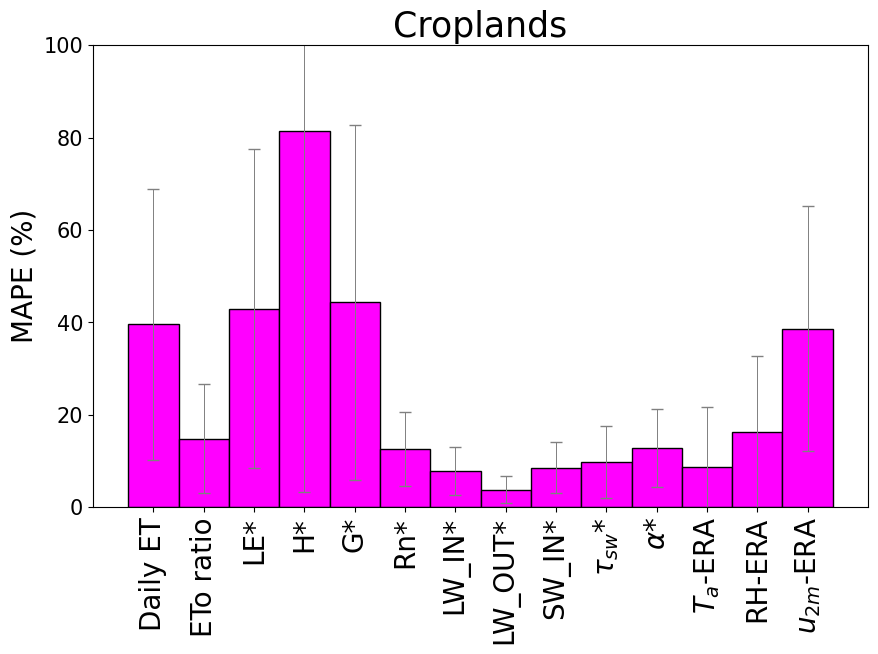

In [36]:
## Let's use this to generate bias charts
import seaborn as sns
from matplotlib import rc

def make_barchart_mae(df,bar_width = 1):
    bars=[]
    bars.append(df["LEd_mae_eto_closed"].mean()*100)
    bars.append(df["ETo_ratio_mae"].mean()*100)
    bars.append(df["LE_inst_mae"].mean()*100)
    bars.append(df["H_inst_mae"].mean()*100)
    bars.append(df["G_inst_mae"].mean()*100)
    bars.append(df["Rn_inst_mae"].mean()*100)
    bars.append(df["LW_IN_mae"].mean()*100)
    bars.append(df["LW_OUT_mae"].mean()*100)
    bars.append(df["SW_IN_mae"].mean()*100)

    bars.append(df["Tao_mae"].mean()*100)
    bars.append(df["Albedo_mae"].mean()*100)
    bars.append(df["Temp_mae"].mean()*100)
    bars.append(df["RH_mae"].mean()*100)
    bars.append(df["u_mae"].mean()*100)
    # print(bars)

    std_bars=[]
    std_bars.append(df["LEd_mae_eto_closed"].std()*100)
    std_bars.append(df["ETo_ratio_mae"].std()*100)
    std_bars.append(df["LE_inst_mae"].std()*100)
    std_bars.append(df["H_inst_mae"].std()*100)
    std_bars.append(df["G_inst_mae"].std()*100)
    std_bars.append(df["Rn_inst_mae"].std()*100)
    std_bars.append(df["LW_IN_mae"].std()*100)
    std_bars.append(df["LW_OUT_mae"].std()*100)
    std_bars.append(df["SW_IN_mae"].std()*100)

    std_bars.append(df["Tao_mae"].std()*100)
    std_bars.append(df["Albedo_mae"].std()*100)
    std_bars.append(df["Temp_mae"].std()*100)
    std_bars.append(df["RH_mae"].std()*100)
    std_bars.append(df["u_mae"].std()*100)
    # palette = sns.color_palette("pastel")
    label=["Daily ET","ETo ratio",'LE*', "H*","G*","Rn*","LW_IN*","LW_OUT*","SW_IN*",r"$\tau_{sw}$*",r"$ \alpha $*",r"$T_a$-ERA","RH-ERA",r"$u_{2m}$-ERA"]
    
    # bar_positions1 = np.arange(len(bars))
    plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

    plt.bar(label,bars , width=bar_width,yerr=std_bars,color="magenta",edgecolor="black" ,error_kw=dict(ecolor='gray', lw=0.7, capsize=4, capthick=1))
    plt.xticks(rotation=90,fontsize=20)
    plt.ylabel("MAPE (%)",fontsize=20)
    plt.yticks(fontsize=15)
    plt.title("Croplands",fontsize=25)
    plt.ylim(0,100)
make_barchart_mae(crop)
# make_barchart_bias(ever)

# make_barchart(error_list[0])

In [556]:
crop["Temp_mae"].mean()*100

8.68021294246327

In [ ]:
## Get the total df for LSTM model 
df=pd.concat(error_list)
df.columns.tolist()
# ml_df=df[[]]
## Let's only take the inputs we talked about 
df=df[["B","R","GR","NIR","SWIR_1","SWIR_2","NDVI","NDWI","ALFA","Albedo","Tao_sw","Tao_sw_am","Rs_down","SW_IN_inst_af","Rl_down","LW_IN_st","Rl_up","LW_OUT_st","Rn","Rn_inst_af","Ginst","G_inst_af","Hinst","H_inst_af","LEinst","LE_inst_af","LE_eto_ups","LE_closed"]]
## Input array 
# df
df.dropna()

,B,R,GR,NIR,SWIR_1,SWIR_2,NDVI,NDWI,ALFA,Albedo,...,Rn,Rn_inst_af,Ginst,G_inst_af,Hinst,H_inst_af,LEinst,LE_inst_af,LE_eto_ups,LE_closed
0,0.063340,0.118890,0.088118,0.196165,0.321400,0.270855,0.245275,-0.380071,0.149141,0.273936,...,328.567639,287.560,26.634283,55.6200,194.445973,72.307200,107.487383,64.347500,50.990584,20.596236
1,0.058582,0.096395,0.087842,0.307100,0.312490,0.205927,0.522200,-0.555163,0.172050,0.144564,...,566.522372,624.742,118.623387,62.6457,145.326963,197.360000,302.572022,40.556300,107.644514,70.115756
2,0.059270,0.096863,0.088310,0.307513,0.311720,0.207055,0.520927,-0.553790,0.172475,0.144564,...,551.075126,624.742,115.508632,62.6457,144.894789,197.360000,290.671706,40.556300,102.991827,70.115756
3,0.075715,0.145400,0.112950,0.299702,0.391855,0.287630,0.346667,-0.452566,0.197514,0.185983,...,463.477094,636.079,123.181873,69.9140,325.790365,312.361000,14.504856,106.679000,6.208963,47.920092
4,0.075495,0.145813,0.112757,0.299950,0.392460,0.292360,0.345784,-0.453572,0.197862,0.185983,...,470.810687,636.079,125.144762,69.9140,306.729648,312.361000,38.936278,106.679000,16.606679,47.920092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.024070,0.021787,0.045245,0.465335,0.180407,0.067960,0.910546,-0.822770,0.169590,0.161642,...,609.319526,581.540,27.497265,14.1090,570.140523,73.057001,11.681738,264.155437,3.203086,154.122436
20,0.031440,0.026545,0.052780,0.503367,0.195615,0.075165,0.899814,-0.810194,0.186101,0.157388,...,583.381613,727.340,31.689430,9.8440,129.694762,170.497230,421.997421,368.250153,127.314719,190.179701
22,0.023355,0.021430,0.042275,0.340815,0.153705,0.055557,0.881682,-0.779295,0.130435,0.152292,...,561.857899,339.080,31.770396,16.9650,128.119456,123.216299,401.968048,181.129466,149.963017,96.605586
23,0.041532,0.059792,0.048490,0.156922,0.223747,0.144217,0.448192,-0.527877,0.102071,0.118229,...,315.891797,315.310,13.436905,0.5770,250.779217,242.060872,51.675674,23.591784,16.954362,6.554710


In [48]:
# os.chdir("D:\\Backup\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\ML_Ready\\Only_biases")
# file_list=os.listdir()
# error_list=[]
# for i in range(len(file_list)):
#     error_list.append(pd.read_csv(file_list[i],parse_dates=["Date"]))
# arm=pd.read_csv("US-ARM.csv",parse_dates=["Date"])
# arm.head()
# print("column names",print(arm.columns.tolist()))
# print("columns of interest", "Date","LE_eto_ups","LE_closed","LEd_bias_eto_closed","ETo_Daily_model","ETo_Daily","ETo_Daily_bias","ETo_model_hourly","ETo","ETo_hourly_bias","ETo_ratio_model","ETo_ratio_station","ETo_ratio_bias","LEinst","LE_inst_af","LE_inst_bias","Rn","Rn_inst_af","Rn_inst_bias","Hinst","H_inst_af","H_inst_bias","Ginst","G_inst_af","G_inst_bias","Closing_err_LE")

['Unnamed: 0.2', 'date', 'Rs_down', 'Rl_up', 'Rl_down', 'Rn', 'Ginst', 'Hinst', 'LEinst', 'LE_Daily_model', 'ETo_model_hourly', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'NDVI', 'ET_24h', 'ALFA', 'Tao_sw', 'Datetime_Local_x', 'Datetime_GMT', 'Unnamed: 0.1', 'Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TAU_1_1_1', 'H_inst_af', 'LE_inst_af', 'FC_1_1_1', 'WS_1_1_1', 'WS_MAX_1_1_1', 'WD_1_1_1', 'USTAR_1_1_1', 'MO_LENGTH_1_1_1', 'T_SONIC_1_1_1', 'CO2_1_1_1', 'H2O_1_1_1', 'U_SIGMA_1_1_1', 'V_SIGMA_1_1_1', 'W_SIGMA_1_1_1', 'T_SONIC_SIGMA_1_1_1', 'FETCH_MAX_1_1_1', 'FETCH_70_1_1_1', 'FETCH_80_1_1_1', 'FETCH_90_1_1_1', 'TAU_SSITC_TEST_1_1_1', 'H_SSITC_TEST_1_1_1', 'LE_SSITC_TEST_1_1_1', 'FC_SSITC_TEST_1_1_1', 'PA_1_1_1', 'TA_1_1_1', 'TA_2_1_1', 'RH_1_1_1', 'RH_2_1_1', 'SW_IN_inst_af', 'LW_IN_1_1_1', 'SW_OUT_1_1_1', 'LW_OUT_1_1_1', 'NETRAD_1_1_2', 'SW_IN_1_1_2', 'PPFD_IN_1_1_1', 'P_1_1_1', 'G_1_1_1', 'G_inst_af', 'G_3_1_1', 'G_4_1_1', 'SWC_1_2_1', 'SWC_1_2_2', 'SWC_1_1_1', 'SWC_1_1_2

In [49]:
# arm[arm["LEd_bias_eto_closed"]>3][["date","longitude","latitude","LE_eto_ups","LEd_bias_eto_closed","LE_closed","LE_unclosed","LE_inst_af","LEinst","Hinst","H_inst_af","H_inst_bias","Date","Rn_inst_af","G_inst_af","Rn"]]
# # arm["LEd_bias_eto_closed"].describe()

a

,date,longitude,latitude,LE_eto_ups,LEd_bias_eto_closed,LE_closed,LE_unclosed,LE_inst_af,LEinst,Hinst,H_inst_af,H_inst_bias,Date,Rn_inst_af,G_inst_af,Rn
16,2016-12-20 17:07:49.654000128,-97.489666,36.601856,37.876488,3.209854,8.997103,8.388363,22.4457,128.079833,158.865976,109.184,0.455030,2016-12-20,272.640,-2.54290,304.517437
31,2018-01-08 17:07:17.856000000,-97.489666,36.601856,58.007144,3.769296,12.162623,10.302623,63.6482,170.221502,107.370274,123.401,-0.129908,2018-01-08,303.193,2.95857,298.580227
32,2018-01-08 17:07:41.747000064,-97.489666,36.601856,58.112826,3.777985,12.162623,10.302623,63.6482,177.951394,112.627991,123.401,-0.087301,2018-01-08,303.193,2.95857,312.026657
34,2018-01-24 17:07:33.280999936,-97.489666,36.601856,39.438663,3.331183,9.105748,6.799567,24.0523,78.871811,214.064920,148.838,0.438241,2018-01-24,311.820,4.78540,323.387338


In [302]:
## Start by looking if any of these have serious outliers
print("outliers/large errors in most LEd, LEinst, Hinst, Ginst")
pd.set_option('display.max_columns', None)
arm[["LE_eto_ups","LE_closed","LEd_bias_eto_closed","ETo_Daily_model","ETo_Daily","ETo_Daily_bias","ETo_model_hourly","ETo","ETo_hourly_bias","ETo_ratio_model","ETo_ratio_station","ETo_ratio_bias","LEinst","LE_inst_af","LE_inst_bias","Rn","Rn_inst_af","Rn_inst_bias","Hinst","H_inst_af","H_inst_bias","Ginst","G_inst_af","G_inst_bias","Closing_err_LE"]].describe()
## Things that stand out: H bias min= -7500% and max is 1543%, LE daily bias max is 377% 
## Lets see when these occur
arm[arm["H_inst_bias"]<-50][["LE_eto_ups","LE_closed","LE_unclosed","LE_inst_af","LEinst","Hinst","H_inst_af","H_inst_bias","Date","Rn_inst_af","G_inst_af","Rn"]]
print("rn on this day",661,"LE+H+G oon this day=(using h from obs),(using H from sebal)" ,500-2+63,500+160+63)
arm[arm["H_inst_bias"]>10][["LE_eto_ups","LEd_bias_eto_closed","LE_closed","LE_unclosed","LE_inst_af","LEinst","Hinst","H_inst_af","H_inst_bias","Date","Rn_inst_af","G_inst_af","Rn"]]
### 
arm=arm[(arm["H_inst_bias"]>=-10) & (arm["H_inst_bias"]<=10) & (arm["LEd_bias_eto_closed"]<=10) & (arm["LEd_bias_eto_closed"]>=-10) & (arm["LE_eto_ups"]>=0) ]


outliers/large errors in most LEd, LEinst, Hinst, Ginst
rn on this day 661 LE+H+G oon this day=(using h from obs),(using H from sebal) 561 723


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

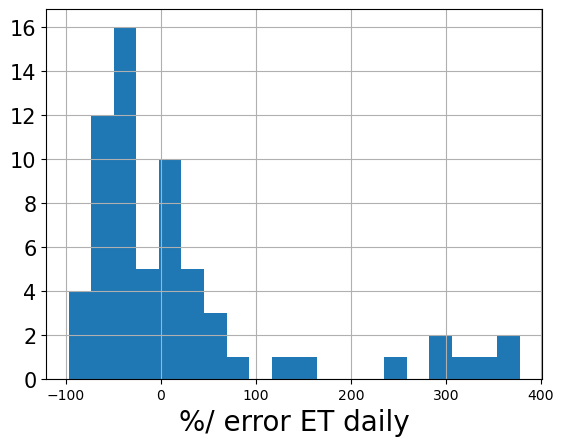

In [304]:
(arm["LEd_bias_eto_closed"]*100).hist(bins=20)
plt.xlabel("%/ error ET daily",fontsize=20)
plt.yticks(fontsize=15)
# plt.plot(arm["LE_closed"]/28.36,arm["LE_eto_ups"]/28.36,"o")
# plt.xlabel("Obs ET")
# plt.ylabel("GEESEBAL ET")
# plt.plot(np.linspace(0,8,8),np.linspace(0,8,8))
crop

correlation matrix


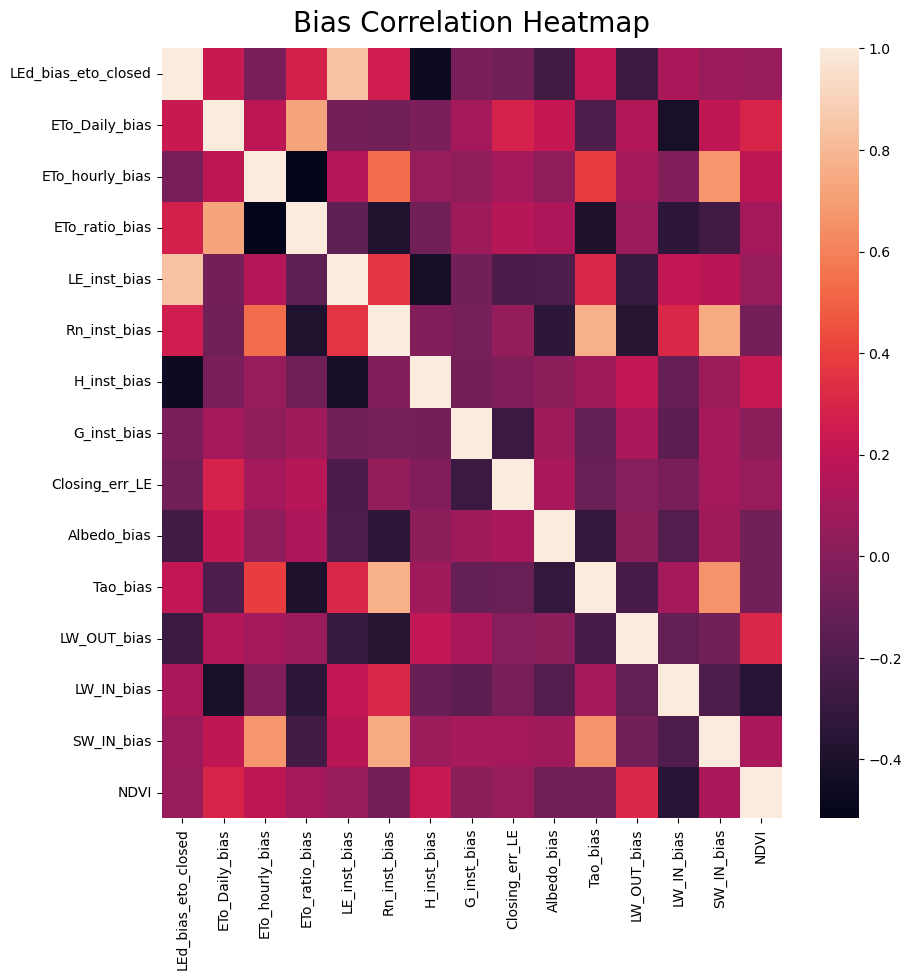

In [398]:
print("correlation matrix")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

dataframe=crop[["LEd_bias_eto_closed","ETo_Daily_bias","ETo_hourly_bias","ETo_ratio_bias","LE_inst_bias","Rn_inst_bias","H_inst_bias","G_inst_bias","Closing_err_LE","Albedo_bias","Tao_bias","LW_OUT_bias","LW_IN_bias","SW_IN_bias","NDVI"]]
heatmap =sns.heatmap(dataframe.corr());
heatmap.set_title('Bias Correlation Heatmap', fontdict={'fontsize':20}, pad=12);


correlation matrix


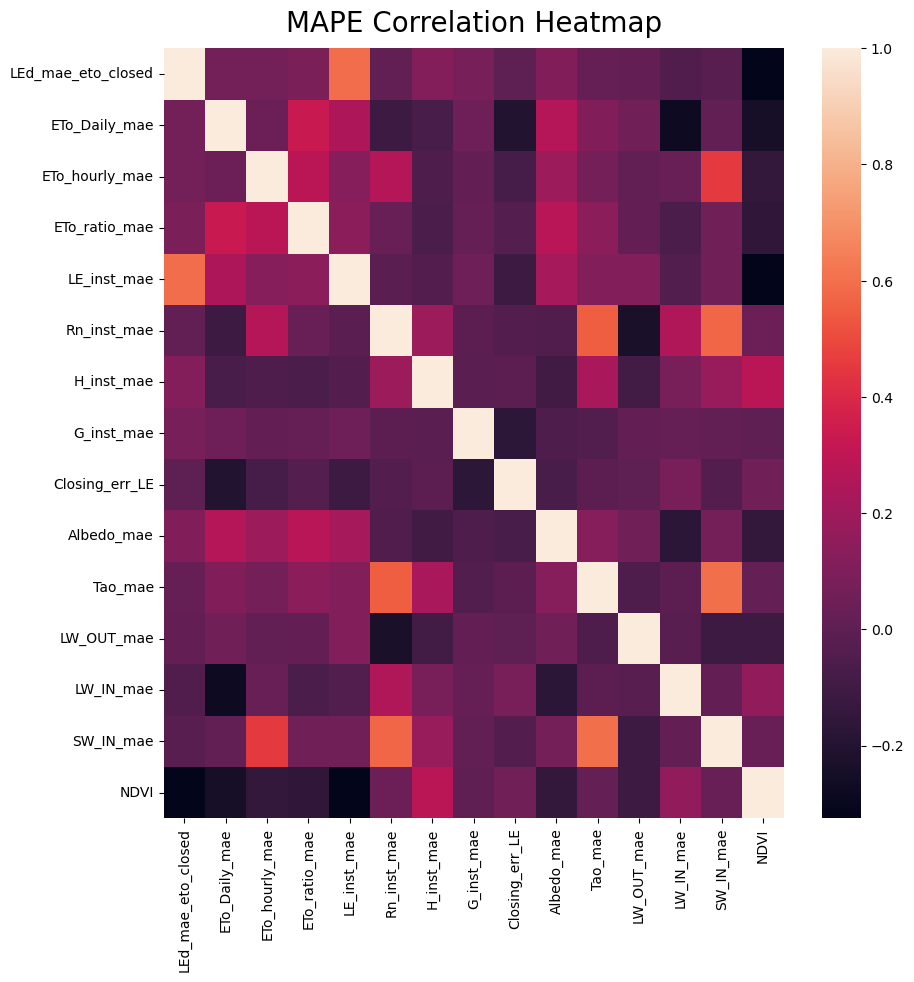

In [397]:
print("correlation matrix")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

dataframe=crop[["LEd_mae_eto_closed","ETo_Daily_mae","ETo_hourly_mae","ETo_ratio_mae","LE_inst_mae","Rn_inst_mae","H_inst_mae","G_inst_mae","Closing_err_LE","Albedo_mae","Tao_mae","LW_OUT_mae","LW_IN_mae","SW_IN_mae","NDVI"]]
heatmap =sns.heatmap(dataframe.corr());
heatmap.set_title('MAPE Correlation Heatmap', fontdict={'fontsize':20}, pad=12);


In [197]:
error_df[["latitude","longitude","Veg"]]

,latitude,longitude,Veg
0,36.601856,-97.489666,CRO
1,36.601856,-97.489666,CRO
2,36.601856,-97.489666,CRO
3,36.601856,-97.489666,CRO
4,36.601856,-97.489666,CRO
...,...,...,...
19,45.495178,-89.584492,DBF
20,45.495178,-89.584492,DBF
21,45.495178,-89.584492,DBF
22,45.495178,-89.584492,DBF


In [198]:
error_df[["latitude","longitude","Veg"]].to_csv("C:\\Users\\rouhi\\Downloads\\ET_station_map.csv")

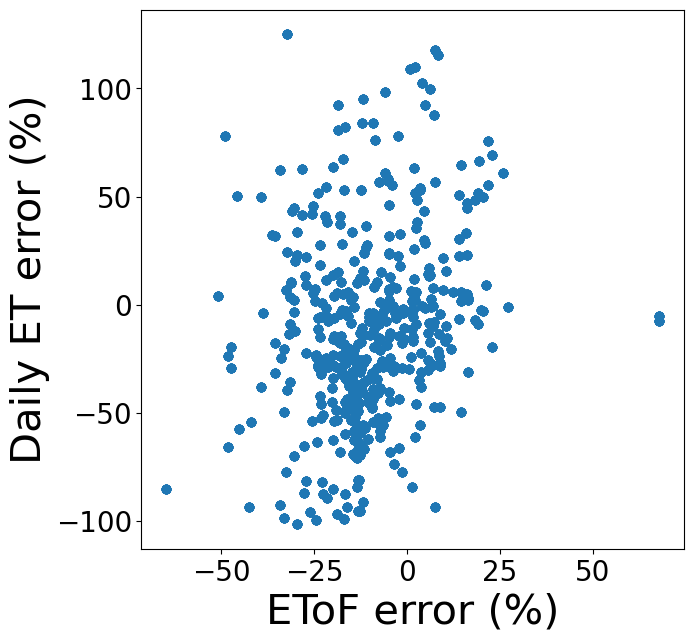

In [160]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
plt.plot(crop["ETo_Daily_bias"]*100,crop["LEd_bias_eto_closed"]*100,"o")
plt.xlabel("EToF error (%)",fontsize=30)
plt.ylabel("Daily ET error (%)",fontsize=30)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])
plt.tick_params(axis='both', which='major', labelsize=20)


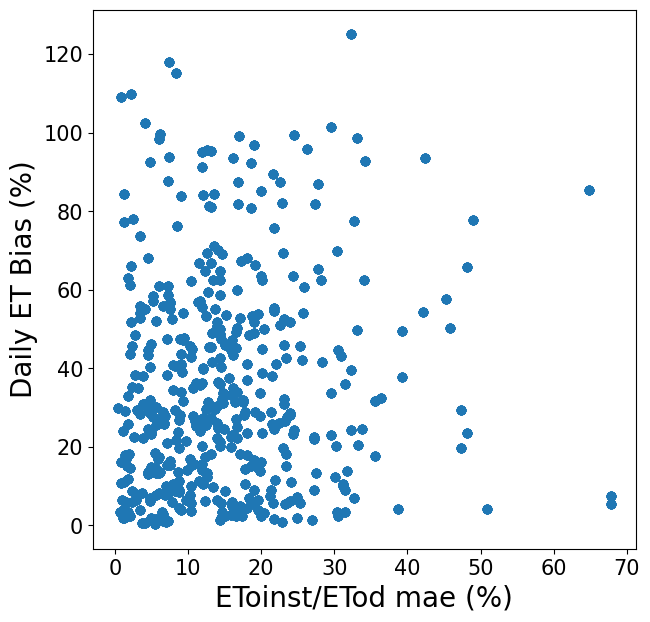

In [153]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

plt.plot(crop["ETo_Daily_mae"]*100,crop["LEd_mae_eto_closed"]*100,"o")
plt.xlabel("EToinst/ETod mae (%)",fontsize=20)
plt.ylabel("Daily ET Bias (%)",fontsize=20)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])
plt.tick_params(axis='both', which='major', labelsize=15)


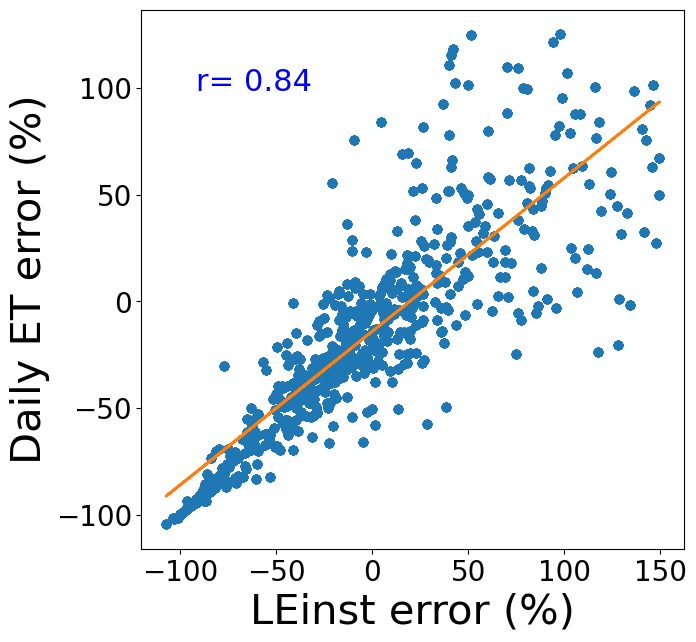

In [180]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
plt.plot(crop["LE_inst_bias"]*100,crop["LEd_bias_eto_closed"]*100,"o")
plt.xlabel("LEinst error (%)",fontsize=30)
plt.ylabel("Daily ET error (%)",fontsize=30)
coefficients = np.polyfit(crop["LE_inst_bias"]*100, crop["LEd_bias_eto_closed"]*100, 1)
poly = np.poly1d(coefficients)
# Generate y values based on the fitted line
y_fit = poly(crop["LE_inst_bias"]*100)
plt.plot(crop["LE_inst_bias"]*100, y_fit,linewidth=2)
correlation_coefficient = np.corrcoef(crop["LE_inst_bias"]*100, crop["LEd_bias_eto_closed"]*100)[0, 1]
plt.annotate(f'r= {correlation_coefficient:.2f}', xy=(0.1, 0.85),
             xycoords='axes fraction', fontsize=22, color='blue')
plt.tick_params(axis='both', which='major', labelsize=20)

# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

Text(0, 0.5, 'Daily ET Bias (%)')

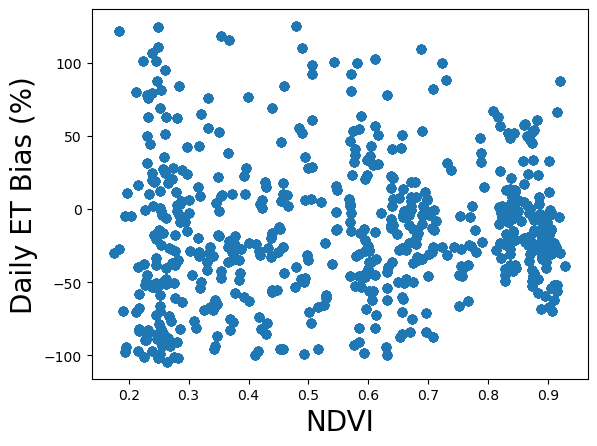

In [53]:
plt.plot(crop["NDVI"],crop["LEd_bias_eto_closed"]*100,"o")
plt.xlabel("NDVI",fontsize=20)
plt.ylabel("Daily ET Bias (%)",fontsize=20)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

Text(0, 0.5, 'LE Bias (%)')

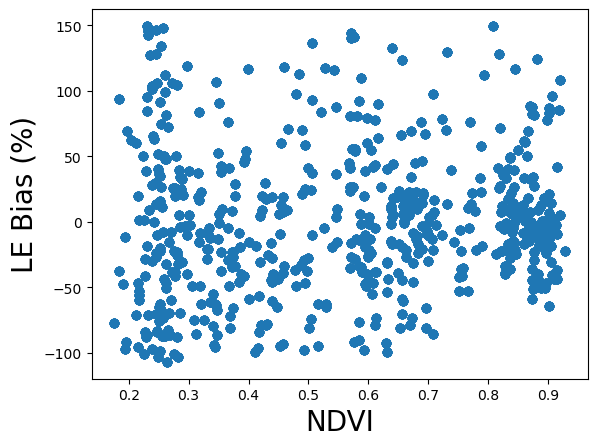

In [54]:
plt.plot(crop["NDVI"],crop["LE_inst_bias"]*100,"o")
plt.xlabel("NDVI",fontsize=20)
plt.ylabel("LE Bias (%)",fontsize=20)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

Text(0, 0.5, 'Daily ET mae (%)')

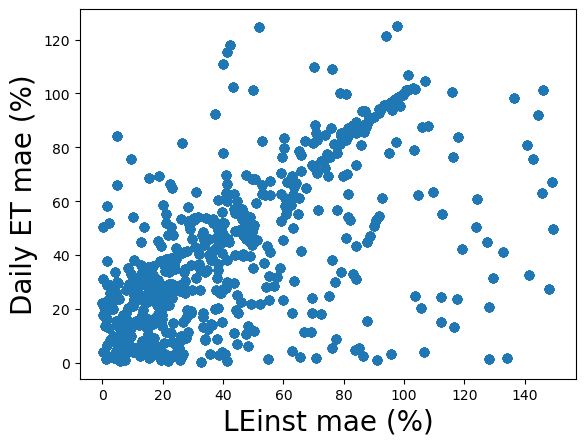

In [55]:
plt.plot(crop["LE_inst_mae"]*100,crop["LEd_mae_eto_closed"]*100,"o")
plt.xlabel("LEinst mae (%)",fontsize=20)
plt.ylabel("Daily ET mae (%)",fontsize=20)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

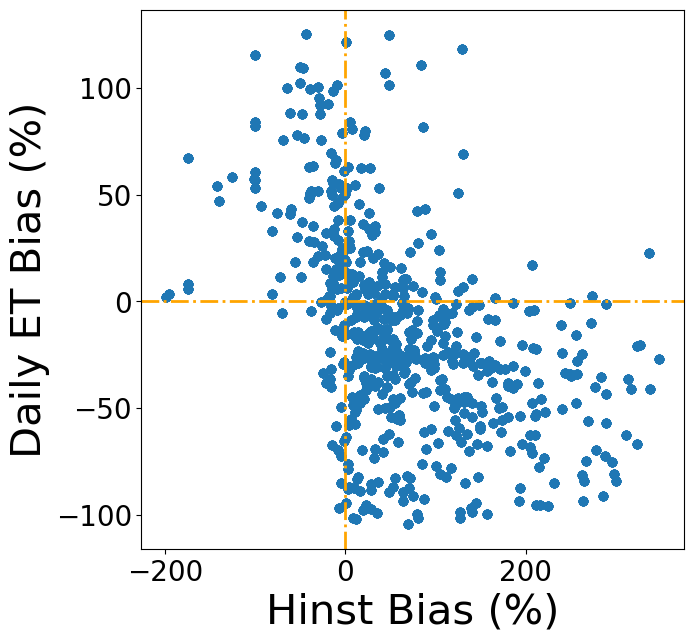

In [194]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
plt.plot(crop["H_inst_bias"]*100,crop["LEd_bias_eto_closed"]*100,"o")
plt.xlabel("Hinst Bias (%)",fontsize=30)
plt.ylabel("Daily ET Bias (%)",fontsize=30)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])
correlation_coefficient = np.corrcoef(crop["H_inst_bias"]*100, crop["LEd_bias_eto_closed"]*100)[0, 1]
# plt.annotate(f'r= {correlation_coefficient:.2f}', xy=(0.1, 0.85),
#              xycoords='axes fraction', fontsize=22, color='blue')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.axvline(x=0, color='orange', linestyle='-.',linewidth=2)
plt.axhline(y=0, color='orange', linestyle='-.',linewidth=2)

# plt.plot(np.linspace)


Text(0, 0.5, 'LEinst Bias (%)')

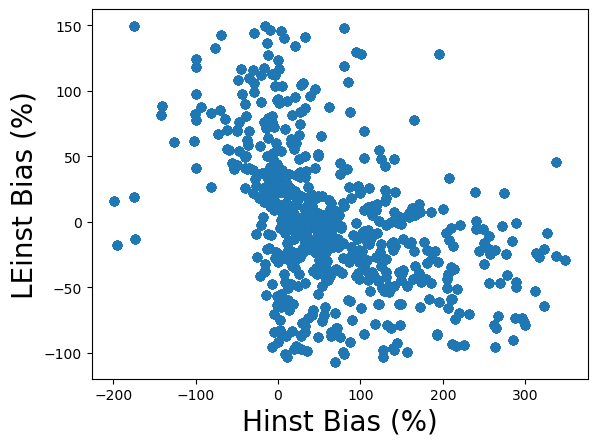

In [57]:
plt.plot(crop["H_inst_bias"]*100,crop["LE_inst_bias"]*100,"o")
plt.xlabel("Hinst Bias (%)",fontsize=20)
plt.ylabel("LEinst Bias (%)",fontsize=20)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

In [58]:
plt.plot(arm["ETo_ratio_bias"],arm["LEd_bias_eto_closed"],"o")
plt.ylabel("LEd bias",fontsize=20)
plt.xlabel("ETo Ratio bias",fontsize=20)

# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

NameError: name 'arm' is not defined

In [59]:
plt.plot(arm["LE_inst_bias"],arm["LEd_bias_eto_closed"],"o")
plt.ylabel("LEd bias",fontsize=20)
plt.xlabel("LEinst bias",fontsize=20)
plt.ylim(-1,1)
plt.xlim(-2,2)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

NameError: name 'arm' is not defined

In [60]:
plt.plot(arm["LE_closed"],arm["LEd_bias_eto_closed"],"o")
plt.ylabel("LEd bias",fontsize=20)
plt.xlabel("LE station(closed) ",fontsize=20)

# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

NameError: name 'arm' is not defined

In [61]:
plt.plot(arm["H_inst_bias"],arm["LEd_bias_eto_closed"],"o")
plt.ylabel("LEd bias",fontsize=20)
plt.xlabel("H inst bias ",fontsize=20)
plt.ylim(-2,3)
plt.xlim(-3,8)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

NameError: name 'arm' is not defined

In [62]:
plt.plot(arm["Rn_inst_bias"],arm["LEd_bias_eto_closed"],"o")
plt.ylabel("LEd bias",fontsize=20)
plt.xlabel("Rnisnt bias",fontsize=20)
# arm["LEd_bias_eto_closed"].corr(arm["ETo_ratio_bias"])

NameError: name 'arm' is not defined

In [63]:
## First let's merge NDVI and Dynamic world to this 
os.chdir("D:\\Backup\\Rouhin_Lenovo\\US_project\\Untitled_Folder\\Dynamic_world")
file_list=os.listdir()
dyn_world=[]
for i in range(len(file_list)):
    for j in range(len(error_list)):
        if error_list[j]["Name"].unique()==file_list[i].split("_")[0]:
            dyn_world.append(pd.read_csv(file_list[i],parse_dates=["date"]))
print("column names:", dyn_world[0].columns)



# Group by the identifier and count consecutive NaN values
# print("stats of nans consecutive",dyn_world[0].label.isnull().astype(int).groupby(dyn_world[0].label.notnull().astype(int).cumsum()).cumsum().describe())


# We now interpolate these datasets 
# Create a datetime timeseries for 1st and 15th day of each month 
daily_series = pd.date_range(start=start_date, end=end_date, freq='1 D')
datetime_series=pd.DataFrame(daily_series)
datetime_series=datetime_series.rename(columns={0:"Date"})
datetime_series["Date"]=pd.to_datetime(datetime_series["Date"])
datetime_series 
dyn_merge=[]
for i in range(len(dyn_world)):
    dyn_world[i]["Date"]=pd.to_datetime(dyn_world[i]["date"].dt.date)
    dyn_merge.append(pd.merge(datetime_series,dyn_world[i],on="Date",how="left"))
def count_consecutive_nas(df):
    # print("stats of nans consecutive",dyn_merge[i].label.isnull().astype(int).groupby(dyn_merge[i].label.notnull().astype(int).cumsum()).cumsum().describe())
    # print("stats of nans before ",df.label.isnull().astype(int).groupby(df.label.notnull().astype(int).cumsum()).cumsum().describe())
    df['Valid_30_days'] = df['Date'].apply(lambda x: df[(x-df['Date']).dt.days.between(1, 30)]['label'].notna().any())
    df=df[df['Valid_30_days']]
    # tmp=df.interpolate(method="ffill",limit=30)
    print("orig shape w all values interpolated", df.interpolate(method="ffill",limit=30).dropna().shape[0])
    # print("Shape if na values are replaced for a month", tmp.dropna().shape[0])
    return df
    # print("stats of nans after ",tmp.label.isnull().astype(int).groupby(tmp.label.notnull().astype(int).cumsum()).cumsum().describe())
    # return 

for i in range(len(dyn_merge)):
    dyn_merge[i]=count_consecutive_nas(dyn_merge[i])
for i in range(len(dyn_merge)):
    # dyn_merge[i]=dyn_merge[i].interpolate(method="ffill")
    dyn_merge[i]=dyn_merge[i].dropna()


column names: Index(['longitude', 'latitude', 'date', 'water', 'trees', 'grass',
       'flooded_vegetation', 'crops', 'shrub_and_scrub', 'built', 'bare',
       'snow_and_ice', 'label'],
      dtype='object')


NameError: name 'start_date' is not defined

In [336]:
error_list[0].columns.tolist()

['Unnamed: 0.2',
 'date',
 'Rs_down',
 'Rl_up',
 'Rl_down',
 'Rn',
 'Ginst',
 'Hinst',
 'LEinst',
 'LE_Daily_model',
 'ETo_model_hourly',
 'Rn24h_G',
 'AirT_G',
 'RH_G',
 'ux_G',
 'SW_Down',
 'NDVI',
 'ET_24h',
 'ALFA',
 'Tao_sw',
 'Datetime_Local_x',
 'Datetime_GMT',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'TIMESTAMP_START',
 'TIMESTAMP_END',
 'TAU_1_1_1',
 'H_inst_af',
 'LE_inst_af',
 'FC_1_1_1',
 'WS_1_1_1',
 'WS_MAX_1_1_1',
 'WD_1_1_1',
 'USTAR_1_1_1',
 'MO_LENGTH_1_1_1',
 'T_SONIC_1_1_1',
 'CO2_1_1_1',
 'H2O_1_1_1',
 'U_SIGMA_1_1_1',
 'V_SIGMA_1_1_1',
 'W_SIGMA_1_1_1',
 'T_SONIC_SIGMA_1_1_1',
 'FETCH_MAX_1_1_1',
 'FETCH_70_1_1_1',
 'FETCH_80_1_1_1',
 'FETCH_90_1_1_1',
 'TAU_SSITC_TEST_1_1_1',
 'H_SSITC_TEST_1_1_1',
 'LE_SSITC_TEST_1_1_1',
 'FC_SSITC_TEST_1_1_1',
 'PA_1_1_1',
 'TA_1_1_1',
 'TA_2_1_1',
 'RH_1_1_1',
 'RH_2_1_1',
 'SW_IN_inst_af',
 'LW_IN_1_1_1',
 'SW_OUT_1_1_1',
 'LW_OUT_1_1_1',
 'NETRAD_1_1_2',
 'SW_IN_1_1_2',
 'PPFD_IN_1_1_1',
 'P_1_1_1',
 'G_1_1_1',
 'G_inst_af',
 'G_3_1

In [337]:
## Merge the datasets 
merged_data=[]
for i in range(len(dyn_merge)):
    merged_data.append(pd.merge(error_list[i],dyn_merge[i],on="Date",how="left"))
    # print(dyn_merge[i].latitude.iloc[0],dyn_merge[i].longitude.iloc[0])
    # print(error_list[i]["latitude"].iloc[0],error_list[i]["longitude"].iloc[0])
    # print(error_list[i]["Lat"].iloc[0],error_list[i]["Long"].iloc[0])
for i in range(len(merged_data)):
    if "NDVI_x" in merged_data[i].columns:
        merged_data[i]=merged_data[i].rename(columns={"NDVI_x":"NDVI"})
    # merged_data.append(pd.merge(error_list[i],dyn_merge[i],on="Date",how="left"))

In [338]:
merged_data[0]

,Unnamed: 0.2,date_x,Rs_down,Rl_up,Rl_down,Rn,Ginst,Hinst,LEinst,LE_Daily_model,ETo_model_hourly,Rn24h_G,AirT_G,RH_G,ux_G,SW_Down,NDVI,ET_24h,ALFA,Tao_sw,Datetime_Local_x,Datetime_GMT,Unnamed: 0.1,Unnamed: 0,TIMESTAMP_START,TIMESTAMP_END,TAU_1_1_1,H_inst_af,LE_inst_af,FC_1_1_1,WS_1_1_1,WS_MAX_1_1_1,WD_1_1_1,USTAR_1_1_1,MO_LENGTH_1_1_1,T_SONIC_1_1_1,CO2_1_1_1,H2O_1_1_1,U_SIGMA_1_1_1,V_SIGMA_1_1_1,W_SIGMA_1_1_1,T_SONIC_SIGMA_1_1_1,FETCH_MAX_1_1_1,FETCH_70_1_1_1,FETCH_80_1_1_1,FETCH_90_1_1_1,TAU_SSITC_TEST_1_1_1,H_SSITC_TEST_1_1_1,LE_SSITC_TEST_1_1_1,FC_SSITC_TEST_1_1_1,PA_1_1_1,TA_1_1_1,TA_2_1_1,RH_1_1_1,RH_2_1_1,SW_IN_inst_af,LW_IN_1_1_1,SW_OUT_1_1_1,LW_OUT_1_1_1,NETRAD_1_1_2,SW_IN_1_1_2,PPFD_IN_1_1_1,P_1_1_1,G_1_1_1,G_inst_af,G_3_1_1,G_4_1_1,SWC_1_2_1,SWC_1_2_2,SWC_1_1_1,SWC_1_1_2,SWC_1_2_3,SWC_1_2_4,SWC_1_1_3,SWC_1_1_4,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_1_2,TS_1_2_2,TS_1_3_2,Rn_inst_af,TAU_1_2_1,H_1_2_1,LE_1_2_1,FC_1_2_1,WS_1_2_1,WS_MAX_1_2_1,WD_1_2_1,USTAR_1_2_1,MO_LENGTH_1_2_1,T_SONIC_1_2_1,TA_1_2_1,PA_1_2_1,RH_1_2_1,CO2_1_2_1,H2O_1_2_1,U_SIGMA_1_2_1,V_SIGMA_1_2_1,W_SIGMA_1_2_1,T_SONIC_SIGMA_1_2_1,FETCH_MAX_1_2_1,FETCH_70_1_2_1,FETCH_80_1_2_1,FETCH_90_1_2_1,TAU_SSITC_TEST_1_2_1,H_SSITC_TEST_1_2_1,LE_SSITC_TEST_1_2_1,FC_SSITC_TEST_1_2_1,TAU_1_3_1,H_1_3_1,LE_1_3_1,FC_1_3_1,WS_1_3_1,WS_MAX_1_3_1,WD_1_3_1,USTAR_1_3_1,MO_LENGTH_1_3_1,T_SONIC_1_3_1,TA_1_3_1,PA_1_3_1,RH_1_3_1,CO2_1_3_1,H2O_1_3_1,U_SIGMA_1_3_1,V_SIGMA_1_3_1,W_SIGMA_1_3_1,T_SONIC_SIGMA_1_3_1,FETCH_MAX_1_3_1,FETCH_70_1_3_1,FETCH_80_1_3_1,FETCH_90_1_3_1,TAU_SSITC_TEST_1_3_1,H_SSITC_TEST_1_3_1,LE_SSITC_TEST_1_3_1,FC_SSITC_TEST_1_3_1,PPFD_OUT_1_1_1,SWC_2_1_1,TS_2_1_1,SWC_2_2_1,TS_2_2_1,SWC_2_3_1,TS_2_3_1,SWC_2_4_1,TS_2_4_1,SWC_2_5_1,TS_2_5_1,SWC_2_6_1,TS_2_6_1,SWC_3_1_1,TS_3_1_1,SWC_3_1_2,TS_3_1_2,SWC_3_2_1,TS_3_2_1,SWC_3_2_2,TS_3_2_2,SWC_3_3_1,TS_3_3_1,SWC_3_3_2,TS_3_3_2,SW_DIR_1_1_1,SW_DIF_1_1_1,T_CANOPY_1_1_1,Name,Long,Lat,Elevation,State,Timezone,Veg,Clim,MAT (°C),MAP (mm),Datetime,Date,Time,doy,Albedo,dec,dr,tao,Rext,Tao_sw_am,P_calc,es,ea,W_calc,Rso,gamma_dust,W_prata,zenith,Mopt,asa,bsa,Tao_sa,Tao_ding,Tao_sebal_insitu,RS_Rso,f,Rns,eps_dash,Rnl,Rn_fao,psychro,del,ETo,ET_frac_inst_obs,EF,led_ef,led_eto,led_swin,LE_closed,LE_unclosed,H_closed,H_unclosed,G_unclosed,SW_IN_daily,ETo_Daily,Rn_unclosed,Xd_Xi_unclosed,Xd_Xi_closed,Xd_Xi_sw,Xd_Xi_eto,Xd_Xi_ef,Led_bias_ef,Led_bias_eto,Led_bias_swin,Led_mae_ef,Led_mae_eto,Led_mae_swin,longitude_x,latitude_x,ETo_Daily_model,etr,Datetime_Local_y,LE_eto_ups,LE_swin_ups,EToinst_daily_model,EToinst_daily_station,LEinst_Daily,ETo_frac_w_station,ETo_frac_w_actual,Rn_inst_bias,H_inst_bias,G_inst_bias,LE_res,LE_inst_bias,Closing_err_LE,LEd_bias_eto_closed,ETo_Daily_bias,ETo_hourly_bias,ETo_ratio_model,ETo_ratio_station,ETo_ratio_bias,longitude_y,latitude_y,date_y,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,snow_and_ice,label,Valid_30_days
0,358,2015-01-16 17:07:12.663000064,465.667970,365.415026,289.636795,306.169623,25.238479,3.723397e+02,-91.408543,-13.480854,156.284809,41.615287,9.261489,46.649182,2.753486,142.043362,0.244359,-0.475347,0.149191,0.709205,2015-01-16 17:07:12.663000064+00:00,2015-01-16 17:00:00+00:00,742,211126,201501161100,201501161130,-0.218260,72.3072,64.3475,-3.09019,8.045870,11.94510,209.6140,0.432142,-96.06070,19.40510,397.817,7.53039,1.288040,1.085250,0.485057,0.403024,52.8807,96.6827,115.705,144.848,0.0,0.0,0.0,0.0,98.2790,NaN,12.52,NaN,30.3,526.400,279.700,144.2000,374.330,247.4,NaN,889.00,0.0,NaN,55.62000,93.3000,NaN,16.15,27.49,NaN,16.76,21.51,33.89,NaN,22.18,NaN,NaN,NaN,NaN,NaN,NaN,287.560,-0.197454,60.7041,35.6278,-2.54602,9.475390,13.42500,207.6930,0.410468,-98.0632,18.80650,18.2869,98.2458,26.3031,400.106,5.61739,1.142620,0.987624,0.520453,0.335177,277.210,506.828,606.544,759.321,0.0,0.0,0.0,0.0,-0.263810,72.9436,NaN,NaN,9.973480,13.11630,209.5420,0.473865,-124.7600,15.95470,15.9547,97.4943,NaN,NaN,NaN,1.163760,0.867013,0.601882,0.282121,675.051,1234.21,1477.03,1849.07,1.0,1.0,N

In [320]:
## Do the correlation matrix for all the stations 
rev_data=[]
for i in range(len(merged_data)):
    merged_data[i]=merged_data[i][(merged_data[i]["H_inst_bias"]>=-10) & (merged_data[i]["H_inst_bias"]<=10) & (merged_data[i]["LEd_bias_eto_closed"]<=10) & (merged_data[i]["LEd_bias_eto_closed"]>=-10) & (merged_data[i]["label"].notna())]
    merged_data[i]=merged_data[i].drop_duplicates(subset=['Date'])

    if merged_data[i].shape[0]>=20:
        rev_data.append(merged_data[i])
    # print()
### Time to see what this data is made of 
for i in range(len(rev_data)):

    # rev_data[i]=rev_data[i][(rev_data[i]["H_inst_bias"]>=-10) & (rev_data[i]["H_inst_bias"]<=10) & (rev_data[i]["LEd_bias_eto_closed"]<=10) & (rev_data[i]["LEd_bias_eto_closed"]>=-10) ]
    # print(rev_data[i]["H_inst_bias"].min())
    print(rev_data[i].shape[0])
    # rev_data[i]=rev_data[i].drop_duplicates(subset=['Date'])
    print("New shape",rev_data[i].shape[0])
    # if rev_data[i]["LEd_bias_eto_closed"].min()<-100:
    #     print(i)
    # if rev_data[i]["H_inst_bias"].max()<-10:
        # print(i)
# rev_data[0][rev_data[0]["H_inst_bias"]>10][["LE_eto_ups","LEd_bias_eto_closed","LE_closed","LE_unclosed","LE_inst_af","LEinst","Hinst","H_inst_af","H_inst_bias","Date","Rn_inst_af","G_inst_af","Rn"]]
## So basicallly high positive ET bias is on days when observed ET daily is very low  and negative bias is when the Observed daily et is slightly negative 
## So for correlation  analysis we can remove those values. We will threshold the values to observe correlation because outliers affect correlation
#  Let's only keep values between 0,10 in H inst abd LEd bias



In [321]:
from scipy.stats import pearsonr
tmp=rev_data[0][["LEd_bias_eto_closed","LE_inst_bias"]].dropna()
pearsonr(tmp["LEd_bias_eto_closed"],tmp["LE_inst_bias"])[1]


IndexError: list index out of range

In [326]:

def get_corr(list_of_df,column_1,column_2,state_variable,state_variable_2):
    ## Function to get the correlation of 2 columns 
    ## State varibale is a constant property of the site eg. land cover, elevation etc. 

    df_new=pd.DataFrame()
    corr,state,name,pval=[],[],[],[]
    for i in range(len(list_of_df)):
        tmp=list_of_df[i][[column_1,column_2]].dropna()
        pval.append(pearsonr(tmp[column_1], tmp[column_2])[1])
        corr.append(tmp[column_1].corr(tmp[column_2]))
        state.append(list_of_df[i][state_variable].unique()[0])
        name.append(list_of_df[i][state_variable_2].unique()[0])

    df_new["Corr"]=corr
    df_new["pval"]=pval

    df_new["State"]=state
    df_new["Name"]=name
    return df_new
# for i in range(len(rev_data)):
#     print(rev_data[i]["LEd_bias_eto_closed"].corr(rev_data[i]["ETo_ratio_bias"]))
## Part 1 is to see LE d varies with what ETo ratio or LEinst 
corr_le_inst=get_corr(rev_data,"LEd_bias_eto_closed","LE_inst_bias","Veg","Name")
corr_eto_ratio=get_corr(rev_data,"LEd_bias_eto_closed","ETo_ratio_bias","Veg","Name")
## 2nd part is just glancing if led is also directly related to any of the other steps 
corr_rn_inst=get_corr(rev_data,"LEd_bias_eto_closed","Rn_inst_bias","Veg","Name")
corr_h_inst=get_corr(rev_data,"LEd_bias_eto_closed","H_inst_bias","Veg","Name")
corr_g_inst=get_corr(rev_data,"LEd_bias_eto_closed","G_inst_bias","Veg","Name")
# corr_ndvi_inst=get_corr(rev_data,"LEd_bias_eto_closed","NDVI","Veg","Name")

# 3rd part is we evaluate le inst errros with other
corrl_rn_inst=get_corr(rev_data,"LE_inst_bias","Rn_inst_bias","Veg","Name")
corrl_h_inst=get_corr(rev_data,"LE_inst_bias","H_inst_bias","Veg","Name")
corrl_g_inst=get_corr(rev_data,"LE_inst_bias","G_inst_bias","Veg","Name")
corrl_g_inst

,Corr,pval,State,Name


In [323]:
corr_le_inst['State'].unique()

array([], dtype=float64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


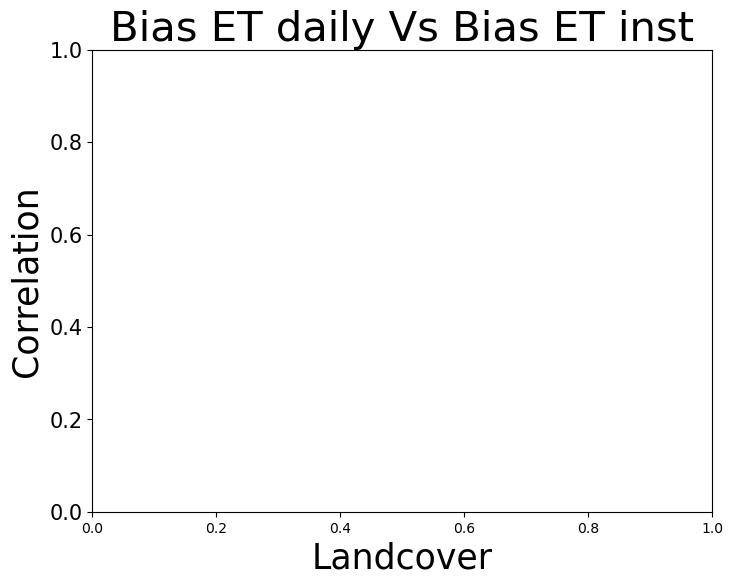

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


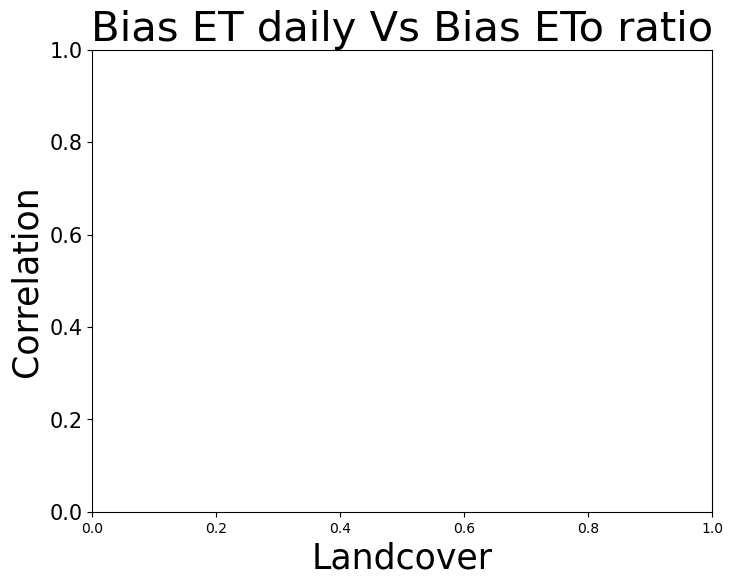

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


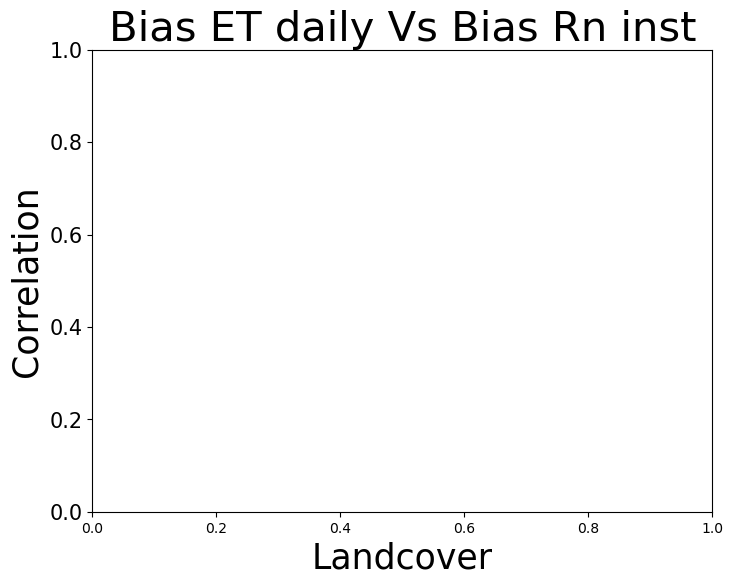

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


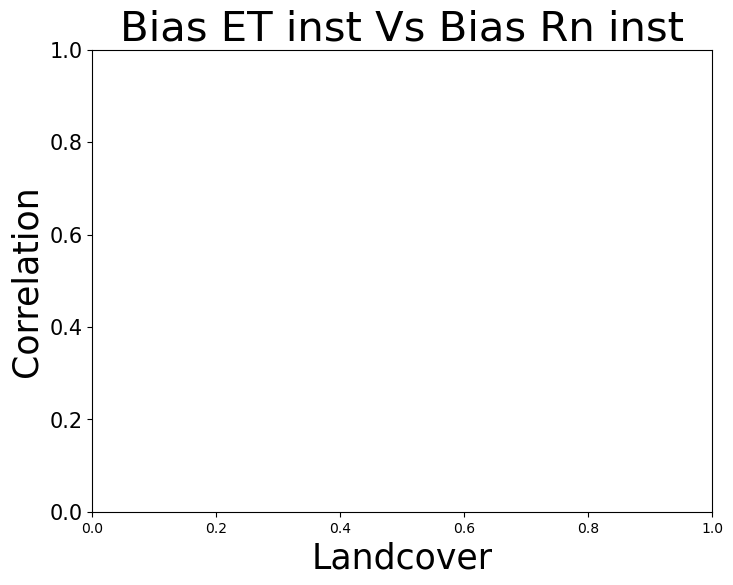

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


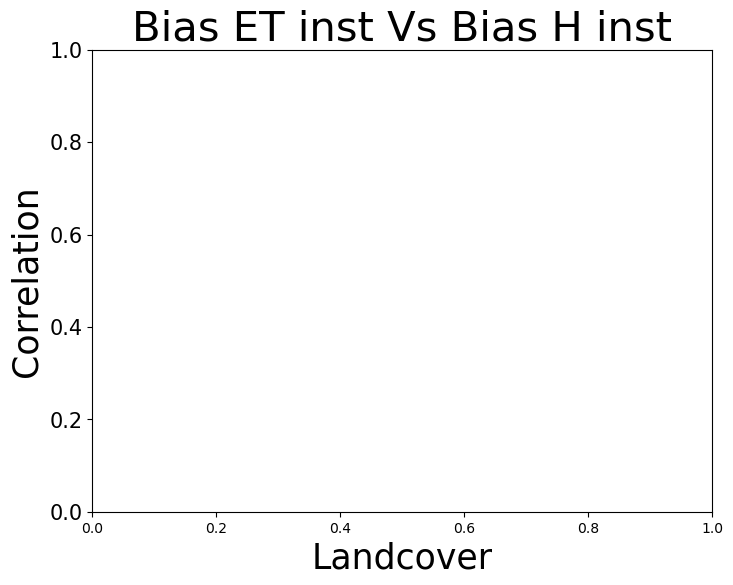

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


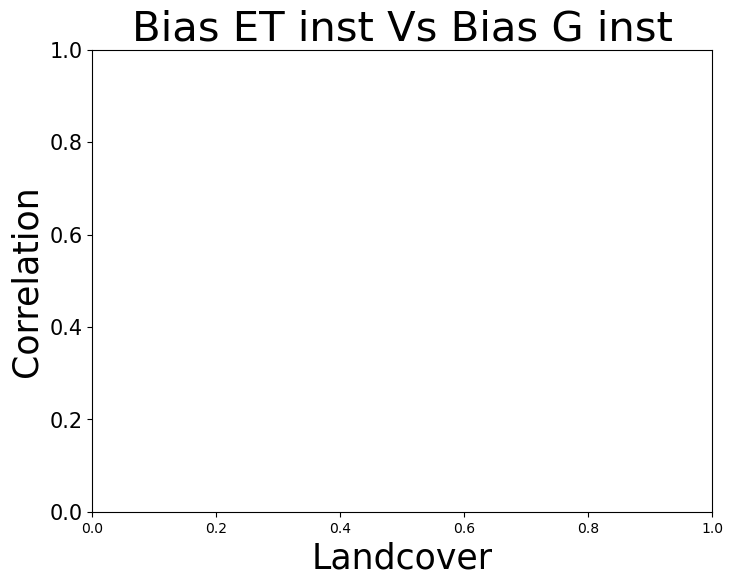

In [325]:
def plotting(df,column1,column2):
    plt.figure(figsize=(8, 6))
    p=0
    # colors=["magenta","gold","brown","darkorange","forestgreen","yellowgreen","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]
    colors=["magenta","gold","brown","darkorange","forestgreen","yellowgreen","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]

    for i,category in enumerate(df['State'].unique()):
        print(i)
        subset = df[df['State'] == category]
        # print(subset)
        plt.scatter(np.repeat(p,subset.shape[0]), subset['Corr'], s=100,label=category,c=colors[i])
        p=p+1

    # Add labels and legend
    plt.xlabel('Landcover',fontsize=25)
    plt.ylabel('Correlation',fontsize=25)
    plt.yticks(fontsize=15)
    plt.title("Bias "+str(column1)+" Vs Bias "+ str(column2),fontsize=30)
    plt.legend(frameon=False)

    # Show the plot
    plt.show()
plotting(corr_le_inst,"ET daily","ET inst")
plotting(corr_eto_ratio,"ET daily","ETo ratio")
plotting(corr_rn_inst,"ET daily","Rn inst")
plotting(corrl_rn_inst,"ET inst","Rn inst")
plotting(corrl_h_inst,"ET inst","H inst")
plotting(corrl_g_inst,"ET inst","G inst")


0
        Corr          pval State    Name
0   0.615733  3.015504e-05   CRO  US-ARM
1   0.915681  8.422955e-36   CRO  US-Bi1
2   0.805657  8.321578e-18   CRO  US-Bi2
8   0.960764  4.468356e-21   CRO  US-Mo1
9   0.912082  3.808700e-13   CRO  US-Mo3
12  0.935592  9.034427e-19   CRO  US-Ne1
13  0.793165  6.287264e-10   CRO  US-Ne2
14  0.957384  4.274667e-22   CRO  US-Ne3
20  0.944291  1.718370e-17   CRO  US-Ro5
21  0.969977  2.355925e-19   CRO  US-Ro6
27  0.759447  4.148016e-05   CRO  US-Tw3
1
        Corr      pval State    Name
3   0.600432  0.000730   ENF  US-Cst
6   0.645402  0.000066   ENF  US-Me2
7   0.488777  0.001022   ENF  US-Me6
11  0.218888  0.293155   ENF  US-MtB
15  0.704504  0.000029   ENF  US-NR1
2
       Corr          pval State    Name
4  0.882954  5.541035e-30   SAV  US-LL1
5  0.516854  9.706567e-03   SAV  US-LL3
3
        Corr      pval State    Name
10  0.760017  0.000004   DBF  US-MOz
4
        Corr          pval State    Name
16  0.789835  1.602005e-06   GRA  US-ONA


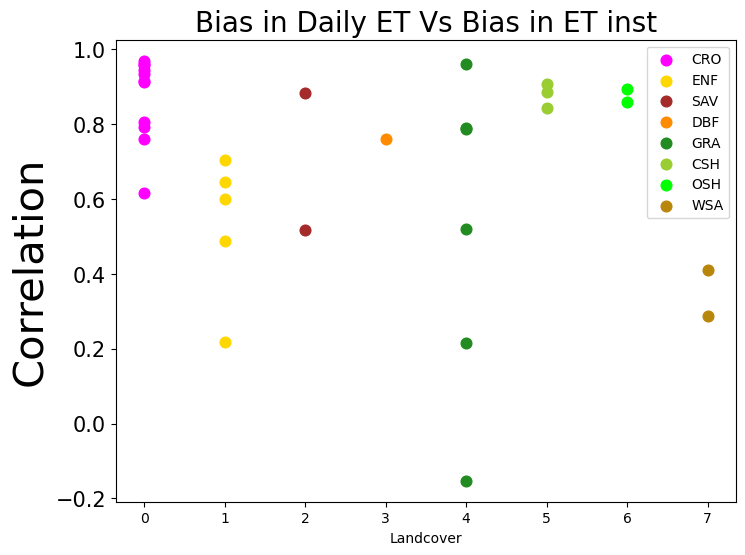

In [ ]:
plt.figure(figsize=(8, 6))
p=0
# colors=["magenta","gold","brown","darkorange","forestgreen","yellowgreen","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]
colors=["magenta","gold","brown","darkorange","forestgreen","yellowgreen","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]

for i,category in enumerate(corr_le_inst['State'].unique()):
    print(i)
    subset = corr_le_inst[corr_le_inst['State'] == category]
    print(subset)
    plt.scatter(np.repeat(p,subset.shape[0]), subset['Corr'], s=59,label=category,c=colors[i])
    p=p+1

# Add labels and legend
plt.xlabel('Landcover')
plt.ylabel('Correlation',fontsize=30)
plt.yticks(fontsize=15)
plt.title("Bias in Daily ET Vs Bias in ET inst",fontsize=20)
plt.legend()

# Show the plot
plt.show()

0
        Corr          pval State    Name
0   0.615733  3.015504e-05   CRO  US-ARM
1   0.915681  8.422955e-36   CRO  US-Bi1
2   0.805657  8.321578e-18   CRO  US-Bi2
8   0.960764  4.468356e-21   CRO  US-Mo1
9   0.912082  3.808700e-13   CRO  US-Mo3
12  0.935592  9.034427e-19   CRO  US-Ne1
13  0.793165  6.287264e-10   CRO  US-Ne2
14  0.957384  4.274667e-22   CRO  US-Ne3
20  0.944291  1.718370e-17   CRO  US-Ro5
21  0.969977  2.355925e-19   CRO  US-Ro6
27  0.759447  4.148016e-05   CRO  US-Tw3
1
        Corr      pval State    Name
3   0.600432  0.000730   ENF  US-Cst
6   0.645402  0.000066   ENF  US-Me2
7   0.488777  0.001022   ENF  US-Me6
11  0.218888  0.293155   ENF  US-MtB
15  0.704504  0.000029   ENF  US-NR1
2
       Corr          pval State    Name
4  0.882954  5.541035e-30   SAV  US-LL1
5  0.516854  9.706567e-03   SAV  US-LL3
3
        Corr      pval State    Name
10  0.760017  0.000004   DBF  US-MOz
4
        Corr          pval State    Name
16  0.789835  1.602005e-06   GRA  US-ONA


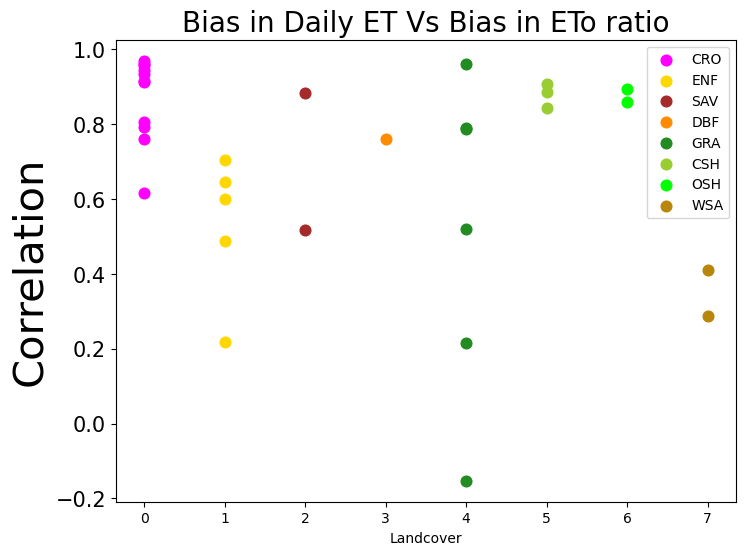

In [ ]:
plt.figure(figsize=(8, 6))
p=0
# colors=["magenta","gold","brown","darkorange","forestgreen","yellowgreen","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]
colors=["magenta","gold","brown","darkorange","forestgreen","yellowgreen","lime","darkgoldenrod","darkolivegreen","lightseagreen","darkslategray"]

for i,category in enumerate(corr_le_inst['State'].unique()):
    print(i)
    subset = corr_le_inst[corr_le_inst['State'] == category]
    print(subset)
    plt.scatter(np.repeat(p,subset.shape[0]), subset['Corr'], s=59,label=category,c=colors[i])
    p=p+1

# Add labels and legend
plt.xlabel('Landcover')
plt.ylabel('Correlation',fontsize=30)
plt.yticks(fontsize=15)
plt.title("Bias in Daily ET Vs Bias in ETo ratio",fontsize=20)
plt.legend()

# Show the plot
plt.show()

In [297]:
## Let's build a basic random forest regressor on the errors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [298]:
# rev_data[0].columns.tolist()
ml_data_mae=crop[["LEd_mae_eto_closed","ETo_Daily_mae","ETo_hourly_mae","ETo_ratio_mae","LE_inst_mae","Rn_inst_mae","H_inst_mae","G_inst_mae","Albedo_mae","Tao_mae","LW_OUT_mae","LW_IN_mae","SW_IN_mae","NDVI","Elevation","Temp_mae","RH_mae","u_mae","NDWI"]]

In [299]:
# ## First we need to take care of the data
# ml_data=[]
# for i in range(len(rev_data)):
#     ml_data.append(rev_data[i][["ETo_Daily_bias","ETo_hourly_bias","ETo_ratio_bias","LE_inst_bias","Rn_inst_bias","H_inst_bias","G_inst_bias","Closing_err_LE",'LEd_bias_eto_closed',"label","Veg","Long","Lat","NDVI","Elevation"]].reset_index().drop(columns="index"))
# for i in range(len(rev_data)):
#     ml_data[i]=ml_data[i].loc[:,~ml_data[i].columns.duplicated()]
# df_select=pd.concat(ml_data)
# df_select["Elevation"]
df_select["Elevation"]
df_select

,LEd_mae_eto_closed,ETo_Daily_mae,ETo_ratio_mae,LE_inst_mae,Rn_inst_mae,H_inst_mae,G_inst_mae,Albedo_mae,Tao_mae,LW_OUT_mae,LW_IN_mae,SW_IN_mae,Elevation,Temp_mae,RH_mae,u_mae,NDVI,NDWI
3,0.870431,0.277893,0.094626,0.864033,0.271353,0.042993,0.761906,0.062004,0.091671,0.012587,0.203872,0.082274,314.0,0.045711,0.090809,0.246149,0.346667,-0.452566
4,0.653451,0.277893,0.097908,0.635015,0.259824,0.018028,0.789981,0.063874,0.091085,0.012052,0.193129,0.077757,314.0,0.045527,0.090374,0.246424,0.345784,-0.453572
5,0.387683,0.201515,0.174283,0.363893,0.184219,0.703771,0.000522,0.109706,0.023378,0.042101,0.107385,0.040780,314.0,0.012336,0.024630,0.444570,0.754287,-0.689385
6,0.449383,0.201515,0.184158,0.421066,0.158516,1.312322,0.033727,0.105163,0.021633,0.042276,0.088476,0.028342,314.0,0.012143,0.025181,0.444592,0.751821,-0.688660
7,0.457727,0.022724,0.266810,0.417147,0.224006,1.167030,1.441356,0.298380,0.062494,0.056371,0.164494,0.101485,314.0,0.037318,0.039988,0.578451,0.755834,-0.704883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.033813,0.007502,0.265597,0.356978,0.300090,0.213210,1.684021,0.047110,0.236904,0.020290,0.041669,0.284113,224.0,0.148519,0.108461,0.206077,0.825014,-0.735819
10,0.243287,0.322745,0.525621,1.123562,0.201244,0.042814,0.197258,0.223043,0.142872,0.074734,0.054410,0.024490,224.0,0.452858,0.023919,0.571961,0.260035,-0.438035
12,0.086475,0.150755,0.171830,0.340805,0.120098,0.321684,0.466170,0.161000,0.009104,0.066255,0.105497,0.031461,224.0,0.280013,0.168508,0.433697,0.284944,-0.414610
13,0.060338,0.160310,0.064082,0.052146,0.029945,0.633995,0.448657,0.052253,0.089661,0.086332,0.080157,0.061350,224.0,0.153013,0.566877,0.507542,0.300476,-0.417752


In [379]:
## For percent error 
df_select=ml_data_mae[["LEd_mae_eto_closed","ETo_Daily_mae","ETo_ratio_mae","LE_inst_mae","Rn_inst_mae","H_inst_mae","G_inst_mae","Albedo_mae","Tao_mae","LW_OUT_mae","LW_IN_mae","SW_IN_mae","Elevation","Temp_mae","RH_mae","u_mae","NDVI","NDWI"]]
# df_select=ml_data_mae[["LEd_mae_eto_closed","ETo_Daily_mae","ETo_ratio_mae","LE_inst_mae","Rn_inst_mae","H_inst_mae","G_inst_mae","Albedo_mae","Tao_mae","LW_OUT_mae","LW_IN_mae","SW_IN_mae","Elevation","Temp_mae","RH_mae","u_mae","NDVI","NDWI"]]
df_select=df_select.dropna()
# LEd_mae_eto_closed
# train_features.describe()
## Stats for training dataset 
# df_encoded = pd.get_dummies(df_select, columns=['label'])
# df_encoded = df_encoded.astype(int)
# df_encoded
# features=df_select[["ETo_Daily_mae","ETo_ratio_mae","Rn_inst_mae","H_inst_mae","G_inst_mae","Albedo_mae","Tao_mae","LW_OUT_mae","LW_IN_mae","SW_IN_mae","Elevation","Temp_mae","RH_mae","u_mae","NDVI"]]
features=df_select[["ETo_Daily_mae","ETo_ratio_mae","SW_IN_mae","Elevation","Temp_mae","RH_mae","u_mae","NDVI"]]

# features=df_select[["Elevation","NDVI"]]

# print("number of Nas",features.isna().sum())
# features=features.dropna()
labels=df_select["LEd_mae_eto_closed"]
# print("shape of input array",features.shape[0])
from sklearn.model_selection import train_test_split
# # Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 36)

In [394]:
df_select

,LEd_mae_eto_closed,ETo_Daily_mae,ETo_ratio_mae,LE_inst_mae,Rn_inst_mae,H_inst_mae,G_inst_mae,Albedo_mae,Tao_mae,LW_OUT_mae,LW_IN_mae,SW_IN_mae,Elevation,Temp_mae,RH_mae,u_mae,NDVI,NDWI
3,0.870431,0.277893,0.094626,0.864033,0.271353,0.042993,0.761906,0.062004,0.091671,0.012587,0.203872,0.082274,314.0,0.045711,0.090809,0.246149,0.346667,-0.452566
4,0.653451,0.277893,0.097908,0.635015,0.259824,0.018028,0.789981,0.063874,0.091085,0.012052,0.193129,0.077757,314.0,0.045527,0.090374,0.246424,0.345784,-0.453572
5,0.387683,0.201515,0.174283,0.363893,0.184219,0.703771,0.000522,0.109706,0.023378,0.042101,0.107385,0.040780,314.0,0.012336,0.024630,0.444570,0.754287,-0.689385
6,0.449383,0.201515,0.184158,0.421066,0.158516,1.312322,0.033727,0.105163,0.021633,0.042276,0.088476,0.028342,314.0,0.012143,0.025181,0.444592,0.751821,-0.688660
7,0.457727,0.022724,0.266810,0.417147,0.224006,1.167030,1.441356,0.298380,0.062494,0.056371,0.164494,0.101485,314.0,0.037318,0.039988,0.578451,0.755834,-0.704883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,0.033813,0.007502,0.265597,0.356978,0.300090,0.213210,1.684021,0.047110,0.236904,0.020290,0.041669,0.284113,224.0,0.148519,0.108461,0.206077,0.825014,-0.735819
10,0.243287,0.322745,0.525621,1.123562,0.201244,0.042814,0.197258,0.223043,0.142872,0.074734,0.054410,0.024490,224.0,0.452858,0.023919,0.571961,0.260035,-0.438035
12,0.086475,0.150755,0.171830,0.340805,0.120098,0.321684,0.466170,0.161000,0.009104,0.066255,0.105497,0.031461,224.0,0.280013,0.168508,0.433697,0.284944,-0.414610
13,0.060338,0.160310,0.064082,0.052146,0.029945,0.633995,0.448657,0.052253,0.089661,0.086332,0.080157,0.061350,224.0,0.153013,0.566877,0.507542,0.300476,-0.417752


In [381]:
# df_select=df_select[["ETo_Daily_bias","ETo_hourly_bias","ETo_ratio_bias","LE_inst_bias","Rn_inst_bias","H_inst_bias","G_inst_bias","Closing_err_LE",'LEd_bias_eto_closed',"label","NDVI","Elevation"]].dropna()
# train_features.describe()
# ## Stats for training dataset 
# df_encoded = pd.get_dummies(df_select, columns=['label'])
# df_encoded = df_encoded.astype(int)
# df_encoded
# features=df_encoded[["ETo_Daily_bias","ETo_hourly_bias","ETo_ratio_bias","LE_inst_bias","Rn_inst_bias","H_inst_bias","G_inst_bias","Closing_err_LE","NDVI","Elevation",\
#     "label_0.0","label_1.0","label_2.0",	"label_3.0",	"label_4.0",	"label_5.0",	"label_6.0",	"label_7.0",	"label_8.0"]]
# # print("number of Nas",features.isna().sum())
# features=features.dropna()
# labels=df_select['LEd_bias_eto_closed']
# # print("shape of input array",features.shape[0])

# from sklearn.model_selection import train_test_split
# # # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 39)

In [382]:
train_features.shape
## Stats for training dataset 
# print("Shape of train",train_features.shape)
# print(df_select[df_select["label"]==4].shape)



(2997, 8)

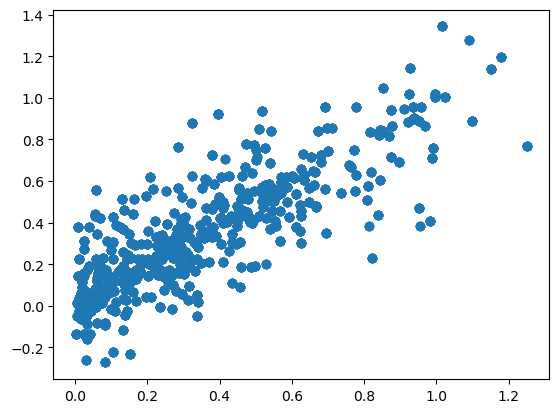

The model performance for the training set
-------------------------------------------
MAE of test set is 0.12688331094450625
RMSE of test set is 0.176670094779339
RMSE of training set is 0.16380390794833644
R2 score of training set is 0.6283241788670724
R2 score of test set is 0.5787131488846764




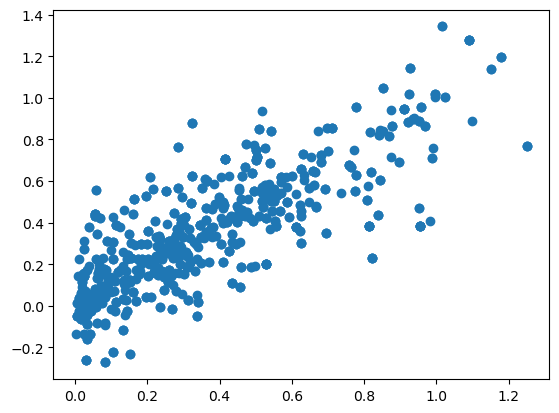

In [383]:
from sklearn import metrics
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  train_features_poly = poly_features.fit_transform(train_features)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(train_features_poly, train_labels)
  
  # predicting on training data-set
  train_labels_predicted = poly_model.predict(train_features_poly)
  # predicting on test data-set
  test_labels_predict = poly_model.predict(poly_features.fit_transform(test_features))
  plt.plot(train_labels,train_labels_predicted,"o")
  plt.show()

  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(train_labels, train_labels_predicted))
  r2_train = r2_score(train_labels, train_labels_predicted)
  plt.plot(test_labels,test_labels_predict,"o")

  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(test_labels, test_labels_predict))
  r2_test = r2_score(test_labels, test_labels_predict)
  mae_test=metrics.mean_absolute_error(test_labels, test_labels_predict)
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("MAE of test set is {}".format(mae_test))

  print("RMSE of test set is {}".format(rmse_test))
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))  
  print("R2 score of test set is {}".format(r2_test))
  
  print("\n")
  
#   print("The model performance for the test set")
#   print("-------------------------------------------")
#   print("RMSE of test set is {}".format(rmse_test))
#   print("R2 score of test set is {}".format(r2_test))
create_polynomial_regression_model(5)

In [384]:
##- Random forest regressor
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100,random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [385]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 6), '%')
rmse_train = np.sqrt(mean_squared_error(predictions, test_labels))
print("RMSE of training set is {}".format(rmse_train))
print("R2 value of test",r2_score(test_labels, predictions))

Mean Absolute Error: 0.001432 %
RMSE of training set is 0.004845388252918837
R2 value of test 0.9996831096716079


In [386]:
predictions
test_labels

99     0.292654
101    0.953486
146    0.757294
161    0.411664
7      0.457727
         ...   
54     0.402770
1      0.518210
41     0.211013
8      0.414968
55     0.114390
Name: LEd_mae_eto_closed, Length: 999, dtype: float64

In [387]:
rf = RandomForestRegressor(n_estimators = 400,min_samples_split=2,min_samples_leaf=2, \
                           max_features=4,max_depth=60,random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [388]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'W/m2.')
rmse_train = np.sqrt(mean_squared_error(predictions, test_labels))
print("RMSE of training set is {}".format(rmse_train))
print("R2 value of test",r2_score(test_labels, predictions))

Mean Absolute Error: 0.0052 W/m2.
RMSE of training set is 0.01341999528563953
R2 value of test 0.9975691590327718


In [376]:
## Randomized grid search for hyper parameter tuning
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 6000, num = 500)]
# Number of features to consider at every split
max_features = ['sqrt',"log2",None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 500, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20,25,30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,3,5,10,15,20,25,30]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10,
               20,
               30,
               40,
               50,
               60,
               70,
               80,
               90,
               100,
               110,
               120,
               130,
               140,
               150,
               160,
               170,
               180,
               190,
               200,
               210,
               220,
               230,
               240,
               250,
               260,
               270,
               280,
               290,
               300,
               310,
               320,
               330,
               340,
               350,
               360,
               370,
               380,
               390,
               400,
               410,
               420,
               430,
               440,
               450,
               460,
               470,
               480,
               490,


In [377]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features,train_labels)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    avg_error=predictions - test_labels
    print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
    print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
    print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(avg_error)))
    print("R2 of test",r2_score(test_labels,predictions))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)
# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Mean Absolute Error (MAE): 0.6491995169577159
Mean Squared Error (MSE): 1.4350258033533358
Root Mean Squared Error (RMSE): 1.1979256251342718
Model Performance
Average Error: 0.0084 degrees.
R2 of test 0.6754626311200738
Mean Absolute Error (MAE): 0.627972201695516
Mean Squared Error (MSE): 1.4457804551376698
Root Mean Squared Error (RMSE): 1.2024061107369963
Model Performance
Average Error: 0.0227 degrees.
R2 of test 0.6730304195283718


In [ ]:
rf_random.best_params_
# rf_random.get_params

{'n_estimators': 1146,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 210,
 'bootstrap': True}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [500,550,600,650,700],
    'min_samples_split': [3,4,5,6,7],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'max_depth': [85,90,95],
    'bootstrap': [True]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
##without dt
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [1750,1770,1800,1820,1850],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'max_depth': [63,65,67,69],
    'bootstrap': [True]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [391]:
# cols=["ETo Daily_error","ETo ratio error","Rn inst error","H inst error","G inst error",r"$\alpha$ error",r"$ \tau$ error","LW OUT error","LW IN error","SW IN error","Elevation",r"$T_a$ error","RH error",r"$u_{2m}$ error","NDVI"]
cols=["ETo Daily_error","ETo ratio error","SW IN error","Elevation",r"$T_a$ error","RH error",r"$u_{2m}$ error","NDVI"]

features.columns

Index(['ETo_Daily_mae', 'ETo_ratio_mae', 'SW_IN_mae', 'Elevation', 'Temp_mae',
       'RH_mae', 'u_mae', 'NDVI'],
      dtype='object')

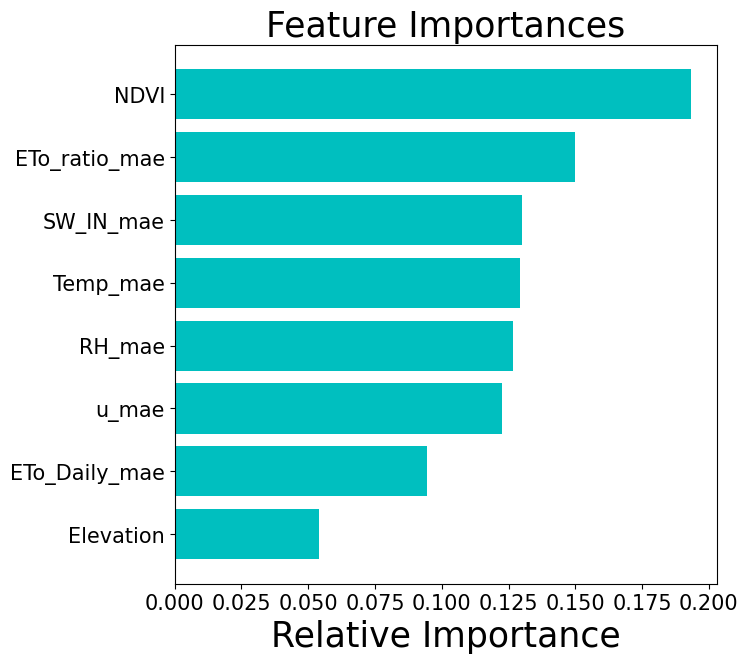

In [389]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

labels = features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances',fontsize=25)
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [labels[i] for i in indices],fontsize=15)
plt.xticks(fontsize=15)

plt.xlabel('Relative Importance',fontsize=25)
plt.show()

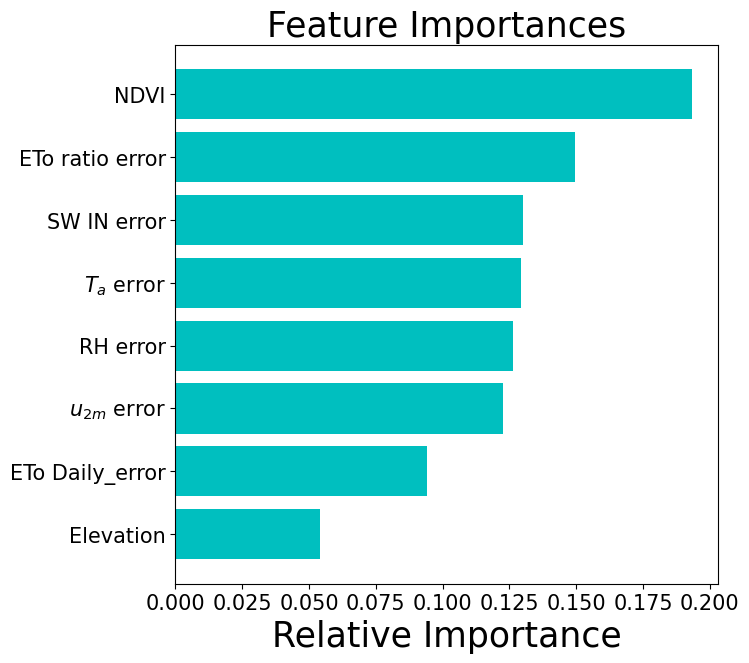

In [392]:
fig,ax=plt.subplots(1,1,figsize=(7,7))

labels = features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances',fontsize=25)
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [cols[i] for i in indices],fontsize=15)
plt.xticks(fontsize=15)

plt.xlabel('Relative Importance',fontsize=25)
plt.show()